# Goal of this notebook

In `fit_synthetic_with_f_transform`, we fit synthetic data by transforming curves to "q-space", performing linear regression there, and then transofrming relevant q's back to curve space. Here, we will do the same thing with real data.

# 1. Relevant functions from the previous notebook

I have now put all the relevant functions from the previous notebook into a .py file called "f_fit_functions".

# 2. Loading real data

## 2.1 Project specific imports

In [44]:
import dyn.dyn.datasets.experimental as experimental
import dyn.dyn.features.f_fit_functions as qfit
import dyn.dyn.features.optimize_am as optimize_am
import dyn.dyn.features.basic as basic
import dyn.dyn.viz as viz

viz.init_matplotlib()

## 2.2 Loading trajectory of border cells

In [3]:
centers_traj, shapes_traj, imgs_traj, labels = experimental.load_trajectory_of_border_cells(n_sampling_points=60)


 Processing trajectory 1/16.
Converting 104438_MAX_9-7.tif into list of cell contours...

 Processing trajectory 2/16.
Converting 33623_MAX_9-2-1-28.tif into list of cell contours...
Found image of a different size: (190, 347) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (190, 347) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (190, 347) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (190, 347) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (190, 347) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (190, 347) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (190, 347) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (190, 347) instead of (512, 512). Skipped image (not cell contours).



 Processing trajectory 7/16.
Converting 59080_MAX_9-7.tif into list of cell contours...
Found image of a different size: (287, 443) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (287, 443) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (287, 443) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (287, 443) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (287, 443) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (287, 443) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (287, 443) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (287, 443) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (287, 443) instead of (512, 512). Skipped image (not cell cont

Found image of a different size: (278, 418) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (278, 418) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (278, 418) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (278, 418) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (278, 418) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (278, 418) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (278, 418) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (278, 418) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (278, 418) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (278, 418) instead of (512, 512). Skipped image (

In the cell above: we load the trajectory of the centers, the shape trajectories, the image trajectories, etc. Shape traectories has all the shapes.

In [56]:
print(shapes_traj.shape)

torch.Size([16, 25, 60, 2])


## 2.3 Testing `f_fit_functions` methods on real and synthetic data

/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:468: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  geodesic_array= np.array([geodesic,recentered_curves])
/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:468: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  geodesic_array= np.array([geodesic,recentered_curves])


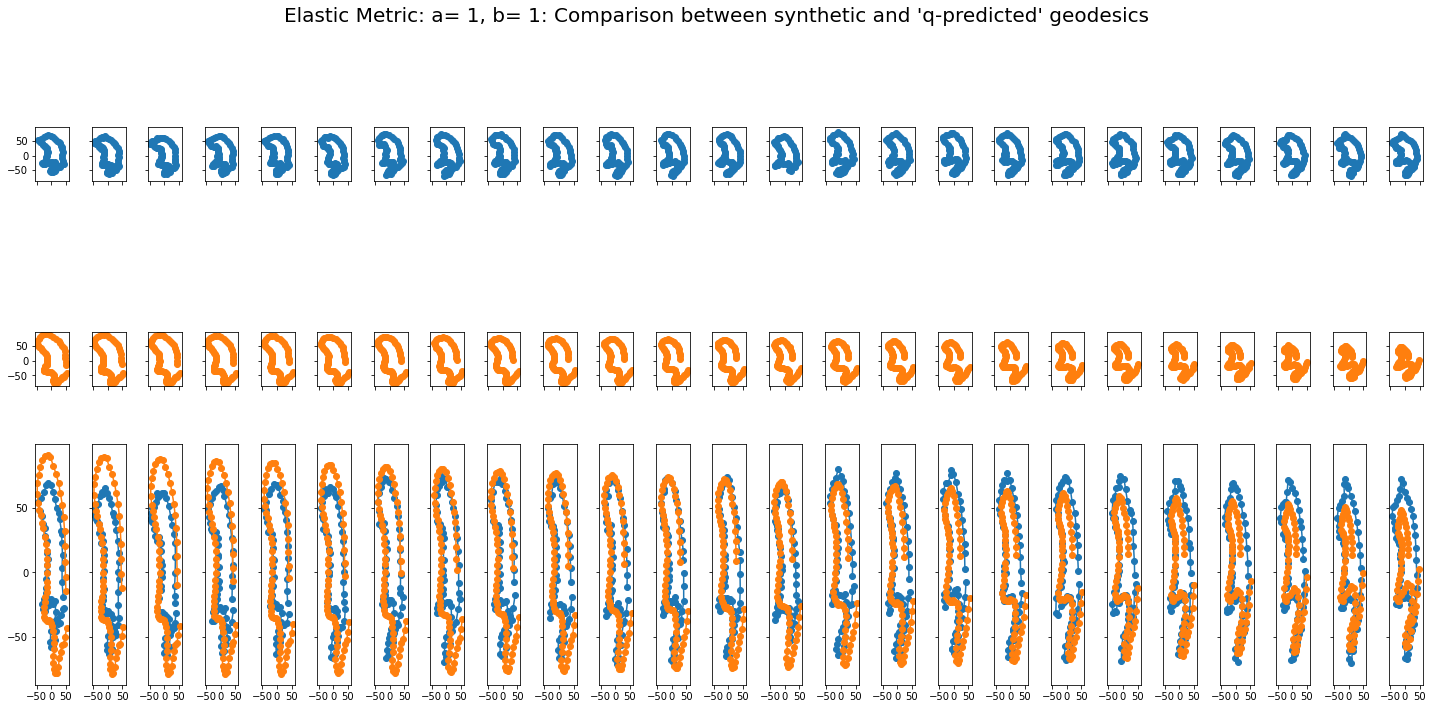

In [89]:
import importlib
importlib.reload(qfit)

qfit.ftrans_plot_predictions(shapes_traj[0],a=1,b=1,split=False)

/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:418: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  
/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:418: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


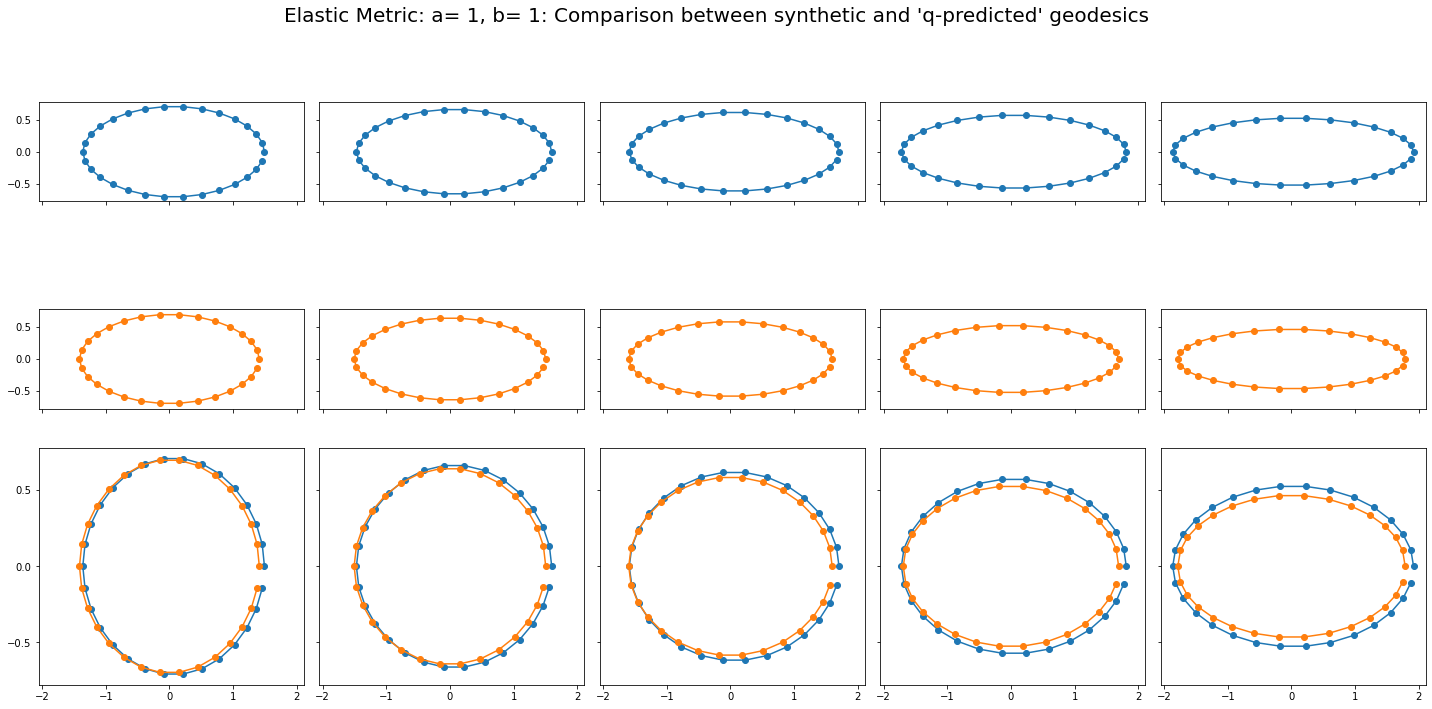

In [74]:
import dyn.dyn.datasets.synthetic as synthetic

n_geodesics = 1
n_times = 10
n_points = 30

#creating our synthetic dataset
geods_circle_ell = synthetic.geodesics_circle_to_ellipse(
    n_geodesics=n_geodesics, n_times=n_times, n_points=n_points
)

qfit.ftrans_plot_predictions(geods_circle_ell[0],1,1,split=True)

# 3. Creating a function that "optimizes" a and b for a specific trajecotry

This next function will have to do with "metric fitting". It will tell us which values of a and b (from a list of a's and b's) give the highest R^2 value to the linear regression that is done in q space.

In [120]:
import importlib
importlib.reload(qfit)

qfit.optimize_ab_linear(shapes_traj[0])

(1, 0.5, 0.11489662834675597)

In [126]:
qfit.optimize_ab_linear(geods_circle_ell[0])

(1, 0.5, 0.9787362016243422)

# 4. Testing the optimization function and different values of a and b

Now, i will test the optimization function on each trajectory.

## 4.0 Testing geodesic 0

1 0.5 0.11489662834675597


/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:264: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  geodesic_array= np.array([geodesic,recentered_curves])
/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:264: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  geodesic_array= np.array([geodesic,recentered_curves])


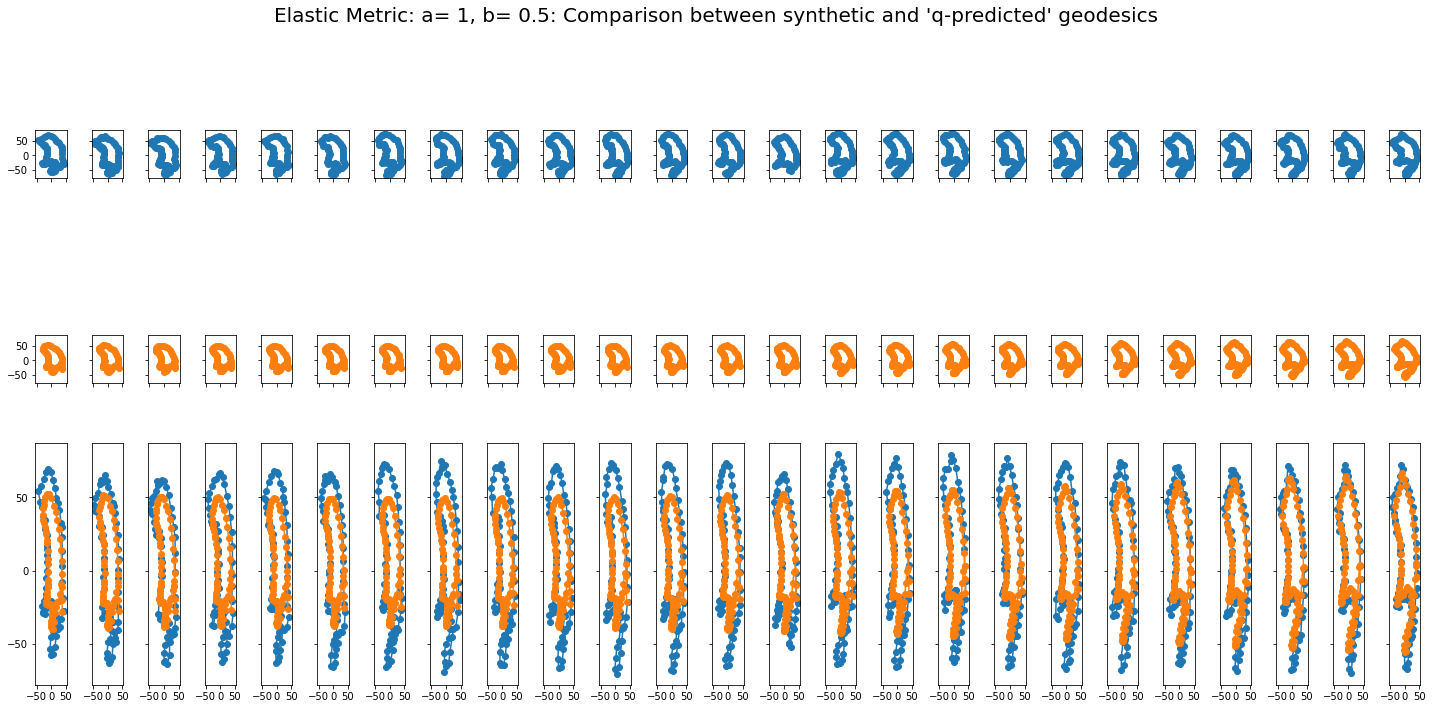

In [137]:
import importlib
importlib.reload(qfit)

a_opt, b_opt, r2_opt = qfit.optimize_ab_linear(shapes_traj[0])
print(a_opt, b_opt, r2_opt)
qfit.ftrans_plot_predictions(shapes_traj[0],a=a_opt,b=b_opt,split=False)

1 0.5 0.11489662834675597


/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:212: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  geodesic_array= np.array([geodesic[half_n_times:],recentered_curves])
/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:212: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  geodesic_array= np.array([geodesic[half_n_times:],recentered_curves])


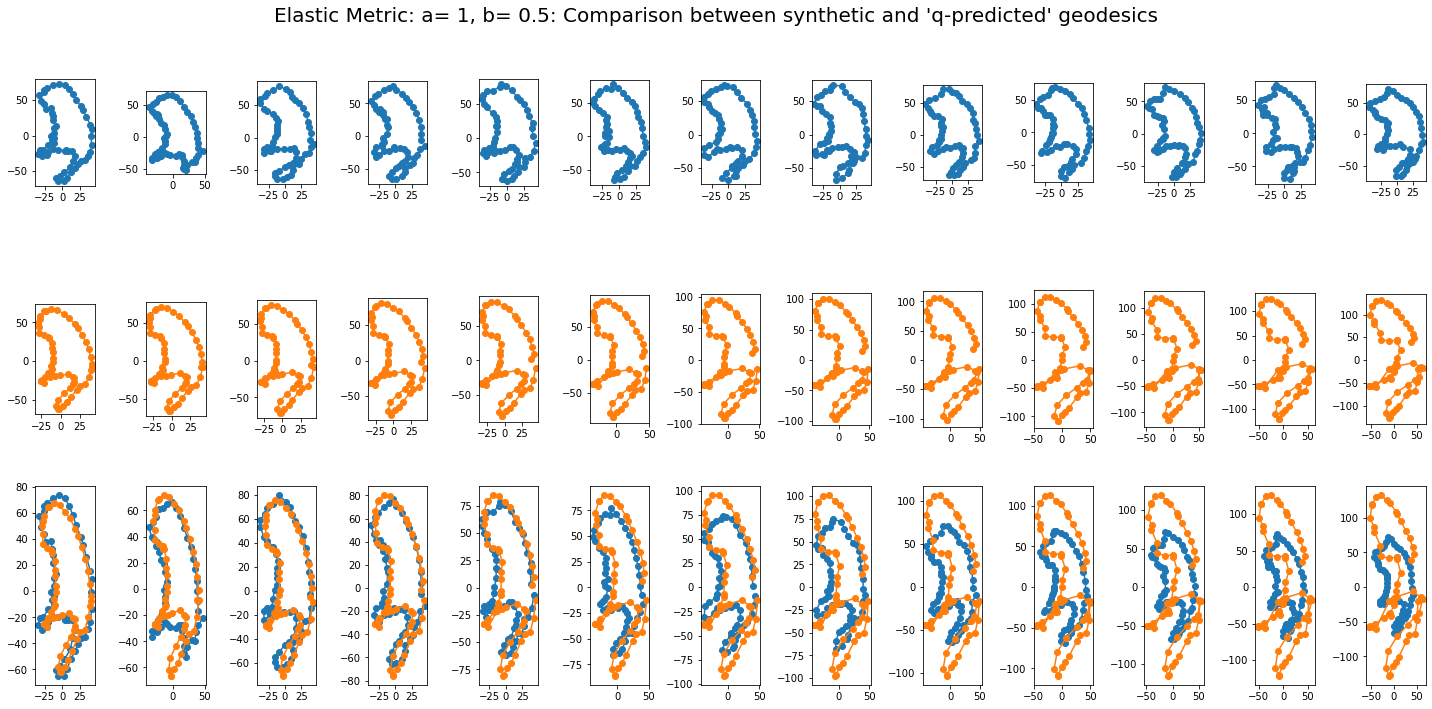

In [138]:
a_opt, b_opt, r2_opt = qfit.optimize_ab_linear(shapes_traj[0])
print(a_opt, b_opt, r2_opt)
qfit.ftrans_plot_predictions(shapes_traj[0],a=a_opt,b=b_opt,split=True)

NOTE: when we don't split the datasets, the predictions are actually pretty reasonable, but when we do split the dataset, the shapes get crazy... i feel like it might not even have that much to do with the shapes not following geodesics and have more to do with something getting messed up numerically.

## 4.1 Testing geodesic 1

1 0.5 0.10450769459876706


/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:212: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  geodesic_array= np.array([geodesic[half_n_times:],recentered_curves])
/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:212: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  geodesic_array= np.array([geodesic[half_n_times:],recentered_curves])


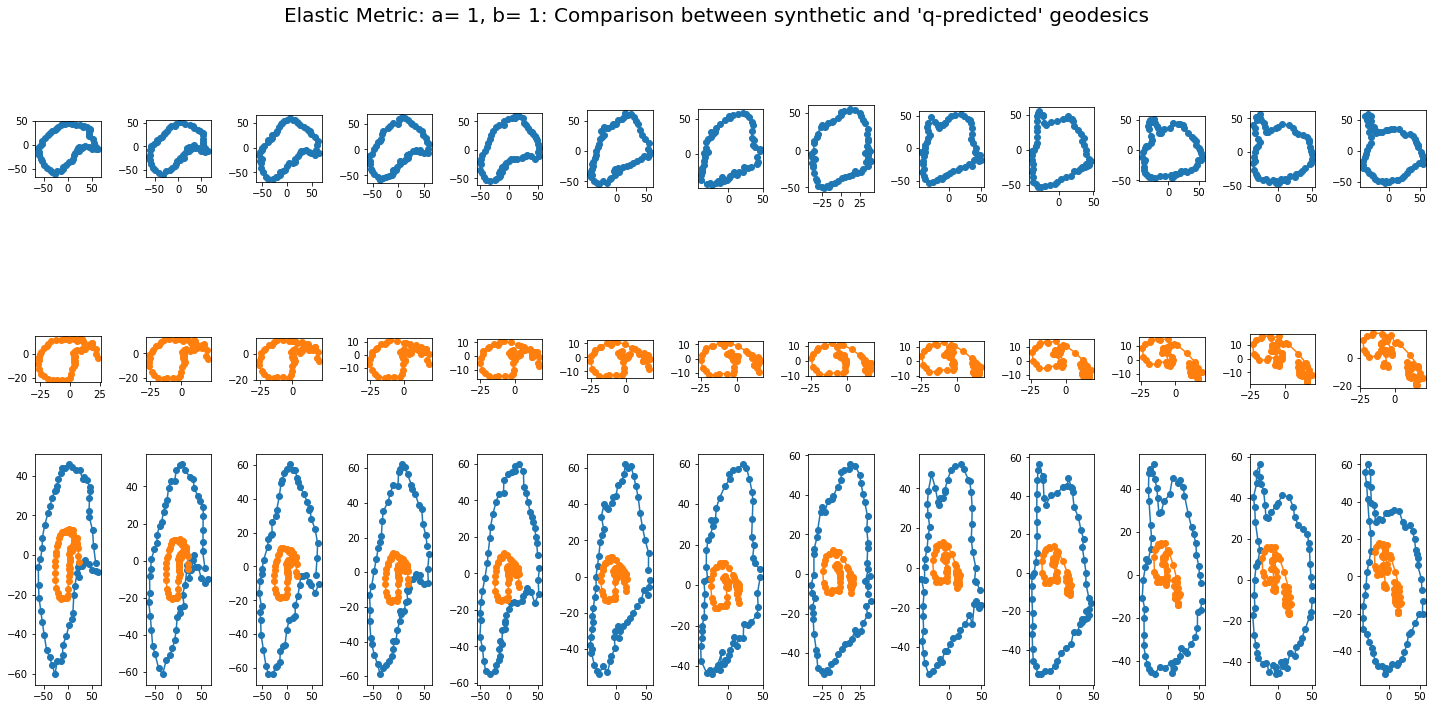

In [139]:
trajectory= shapes_traj[1]
a_opt, b_opt, r2_opt = qfit.optimize_ab_linear(trajectory)
print(a_opt, b_opt, r2_opt)
qfit.ftrans_plot_predictions(trajectory,a=1,b=1,split=True)

1 0.5 0.10450769459876706


/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:264: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  geodesic_array= np.array([geodesic,recentered_curves])
/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:264: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  geodesic_array= np.array([geodesic,recentered_curves])


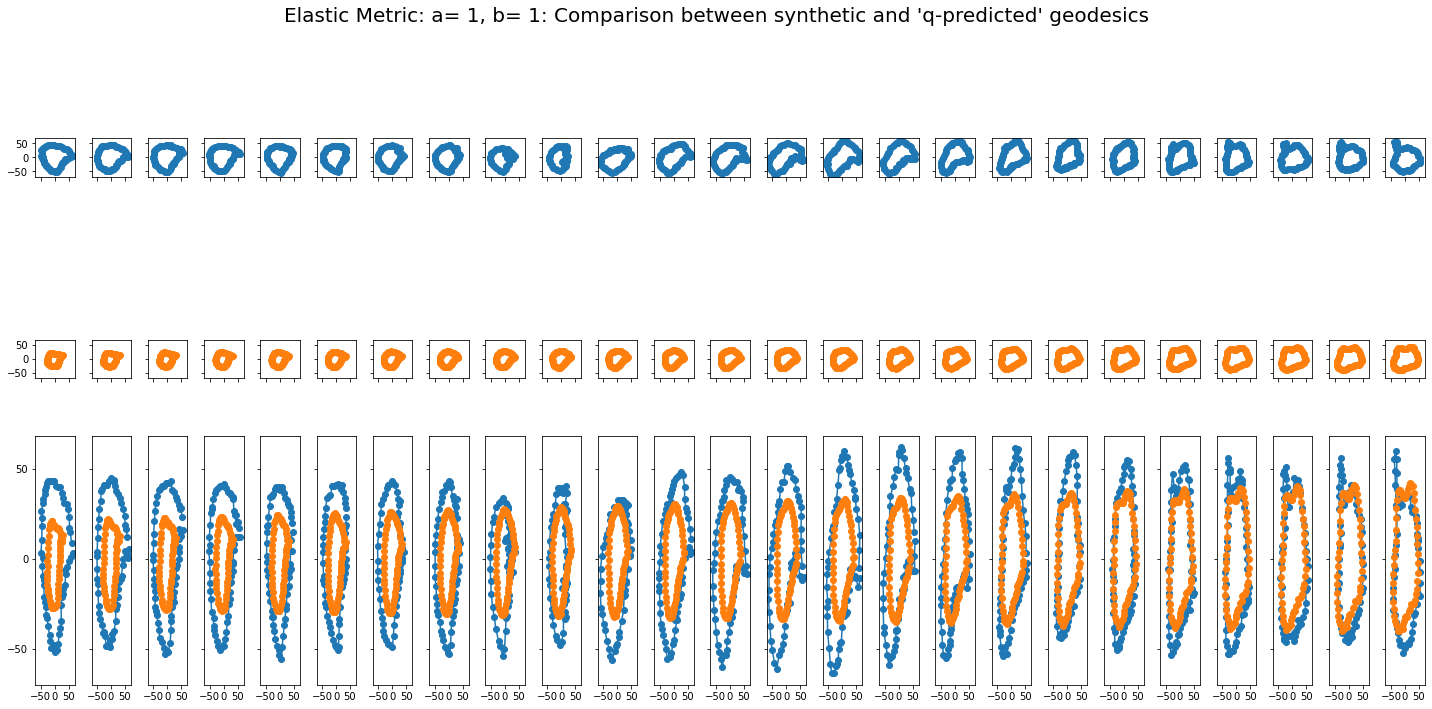

In [140]:
trajectory= shapes_traj[1]
a_opt, b_opt, r2_opt = qfit.optimize_ab_linear(trajectory)
print(a_opt, b_opt, r2_opt)
qfit.ftrans_plot_predictions(trajectory,a=1,b=1,split=False)

Weird!! Here, it looks like it fits better at the end...

## 4.2 Testing geodesic 2

1 0.5 0.1682377696848803


/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:212: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  geodesic_array= np.array([geodesic[half_n_times:],recentered_curves])
/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:212: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  geodesic_array= np.array([geodesic[half_n_times:],recentered_curves])


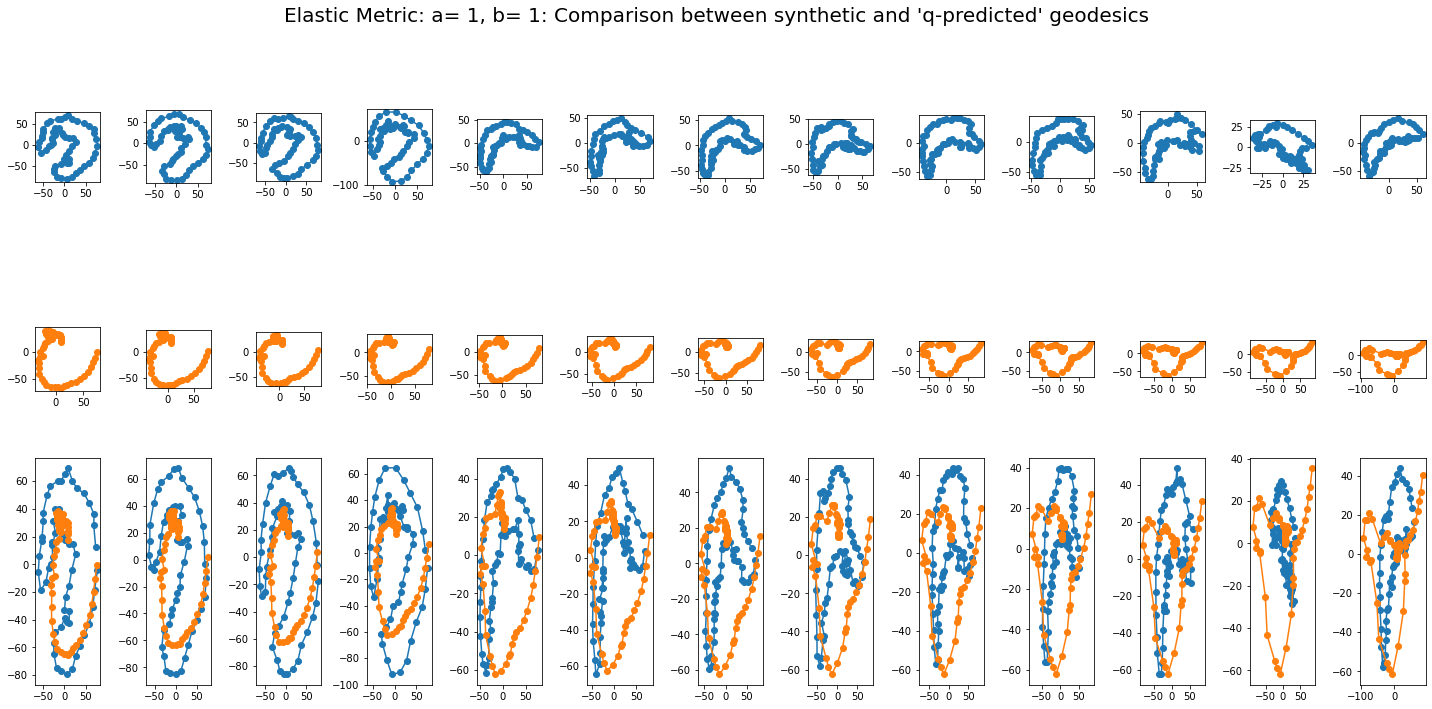

In [141]:
trajectory= shapes_traj[2]
a_opt, b_opt, r2_opt = qfit.optimize_ab_linear(trajectory)
print(a_opt, b_opt, r2_opt)
qfit.ftrans_plot_predictions(trajectory,a=1,b=1,split=True)

1 0.5 0.1682377696848803


/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:264: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  geodesic_array= np.array([geodesic,recentered_curves])
/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:264: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  geodesic_array= np.array([geodesic,recentered_curves])


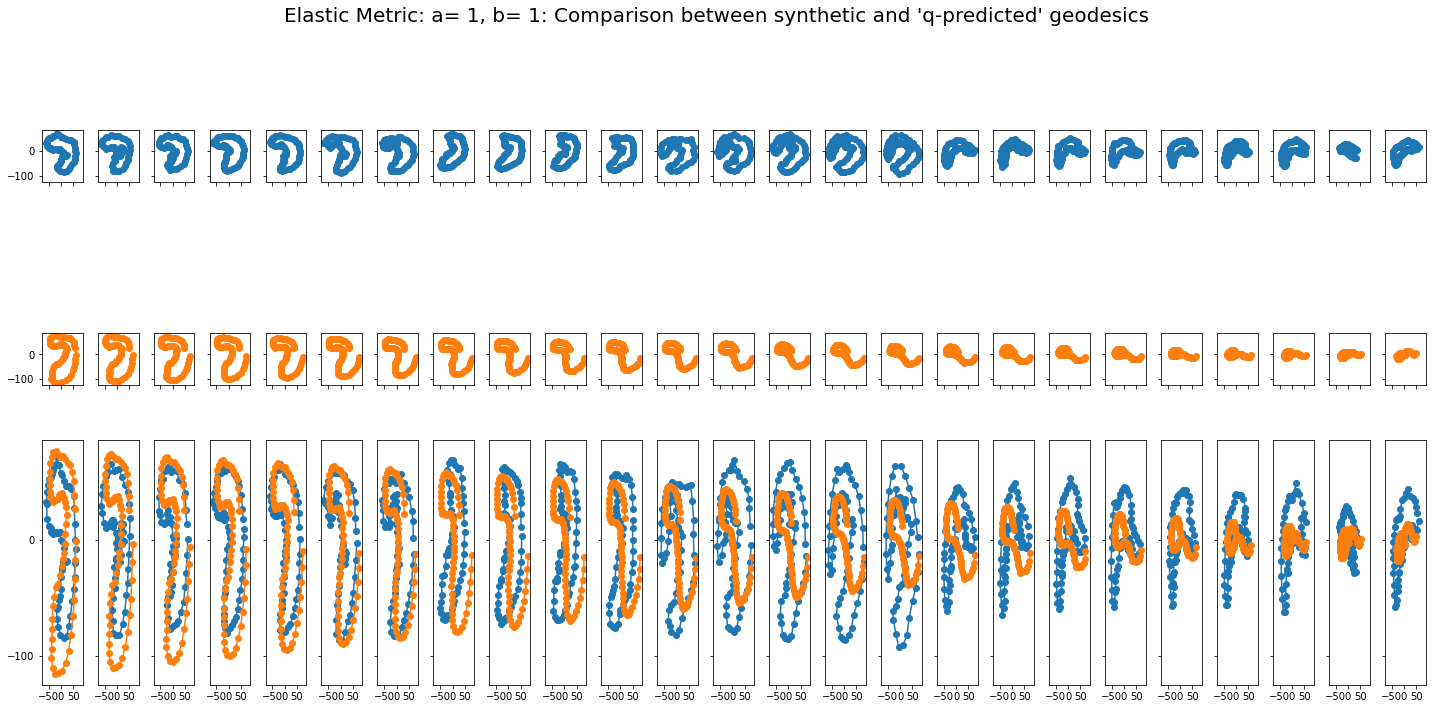

In [143]:
trajectory= shapes_traj[2]
a_opt, b_opt, r2_opt = qfit.optimize_ab_linear(trajectory)
print(a_opt, b_opt, r2_opt)
qfit.ftrans_plot_predictions(trajectory,a=1,b=1,split=False)

## 4.3 Testing geodesic 3

1 0.5 0.06918359224294232


/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:212: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  geodesic_array= np.array([geodesic[half_n_times:],recentered_curves])
/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:212: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  geodesic_array= np.array([geodesic[half_n_times:],recentered_curves])


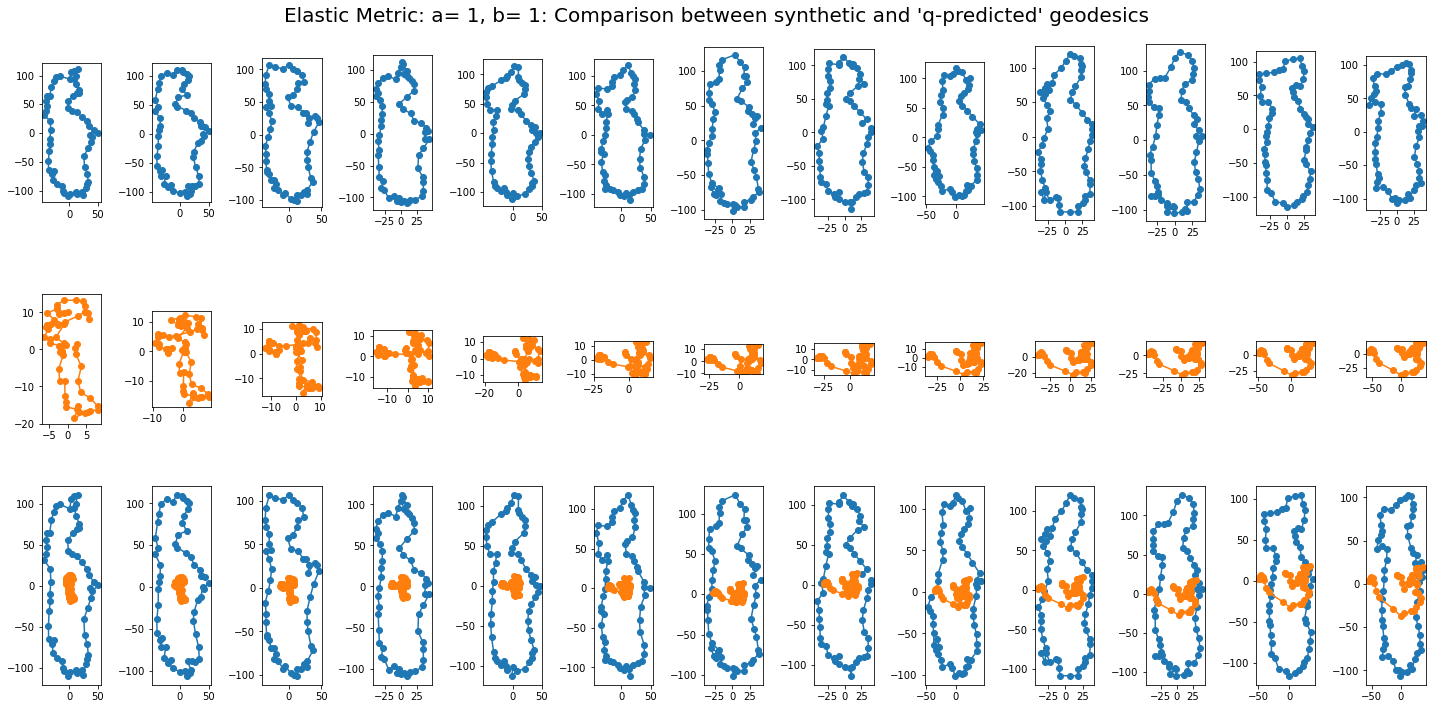

In [144]:
trajectory= shapes_traj[3]
a_opt, b_opt, r2_opt = qfit.optimize_ab_linear(trajectory)
print(a_opt, b_opt, r2_opt)
qfit.ftrans_plot_predictions(trajectory,a=1,b=1,split=True)

1 0.5 0.06918359224294232


/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:264: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  geodesic_array= np.array([geodesic,recentered_curves])
/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:264: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  geodesic_array= np.array([geodesic,recentered_curves])


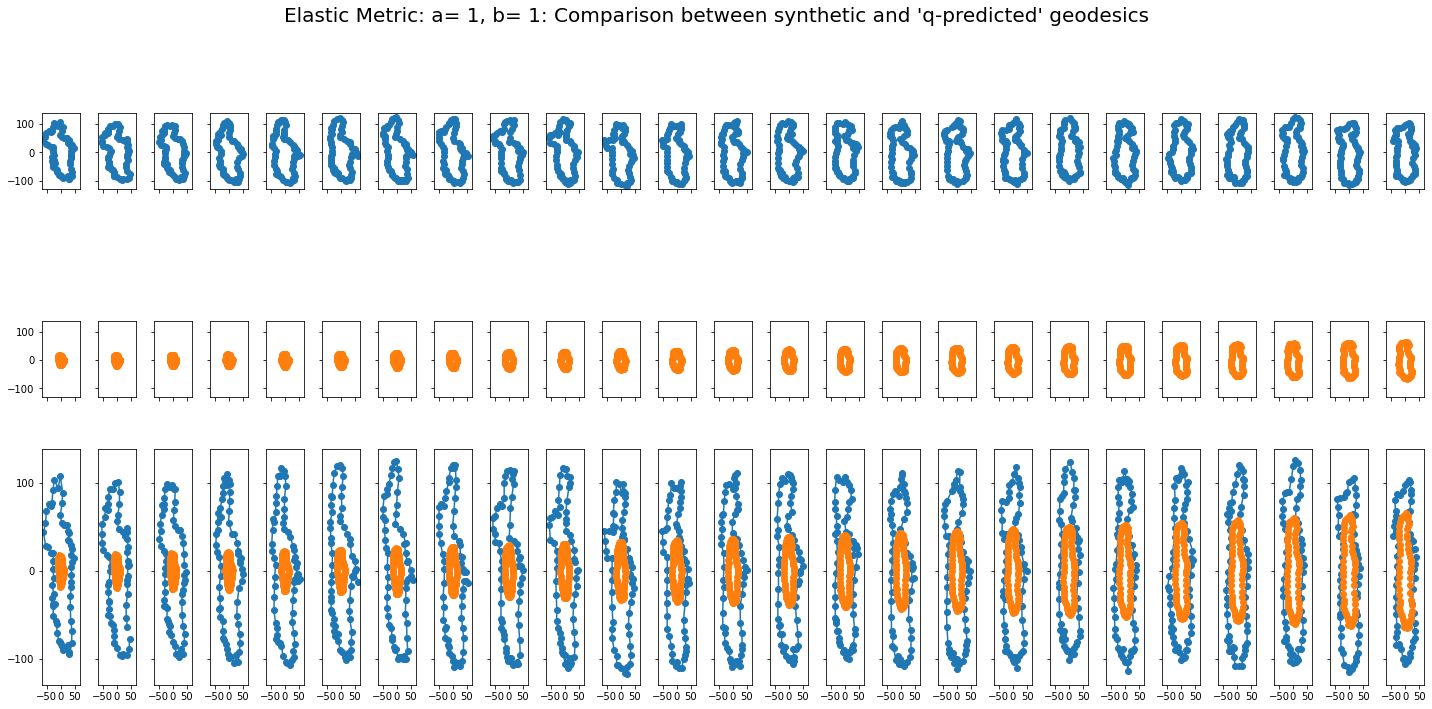

In [149]:
trajectory= shapes_traj[3]
a_opt, b_opt, r2_opt = qfit.optimize_ab_linear(trajectory)
print(a_opt, b_opt, r2_opt)
qfit.ftrans_plot_predictions(trajectory,a=1,b=1,split=False)

## 4.4 Testing geodesic 4

1 0.5 0.08492929038021185


/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:212: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  geodesic_array= np.array([geodesic[half_n_times:],recentered_curves])
/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:212: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  geodesic_array= np.array([geodesic[half_n_times:],recentered_curves])


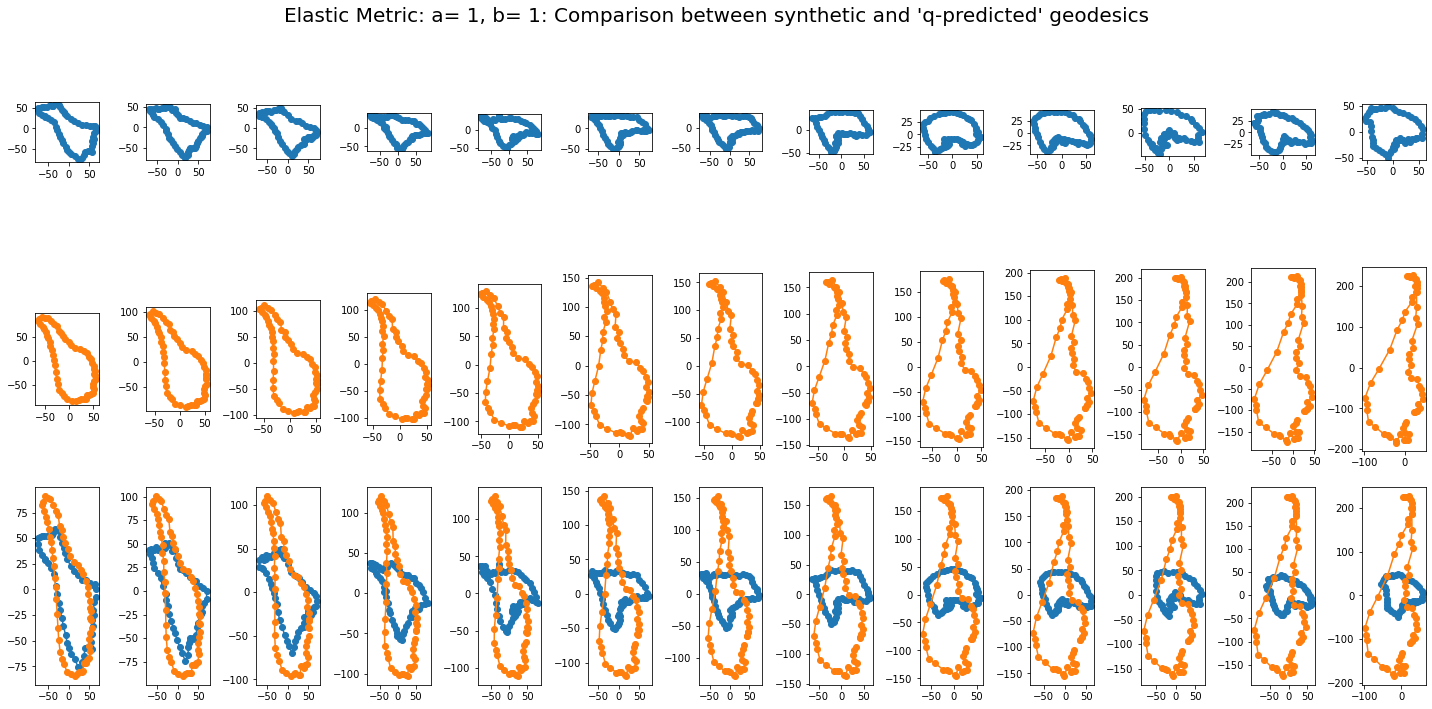

In [150]:
trajectory= shapes_traj[4]
a_opt, b_opt, r2_opt = qfit.optimize_ab_linear(trajectory)
print(a_opt, b_opt, r2_opt)
qfit.ftrans_plot_predictions(trajectory,a=1,b=1,split=True)

1 0.5 0.08492929038021185


/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:264: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  geodesic_array= np.array([geodesic,recentered_curves])
/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:264: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  geodesic_array= np.array([geodesic,recentered_curves])


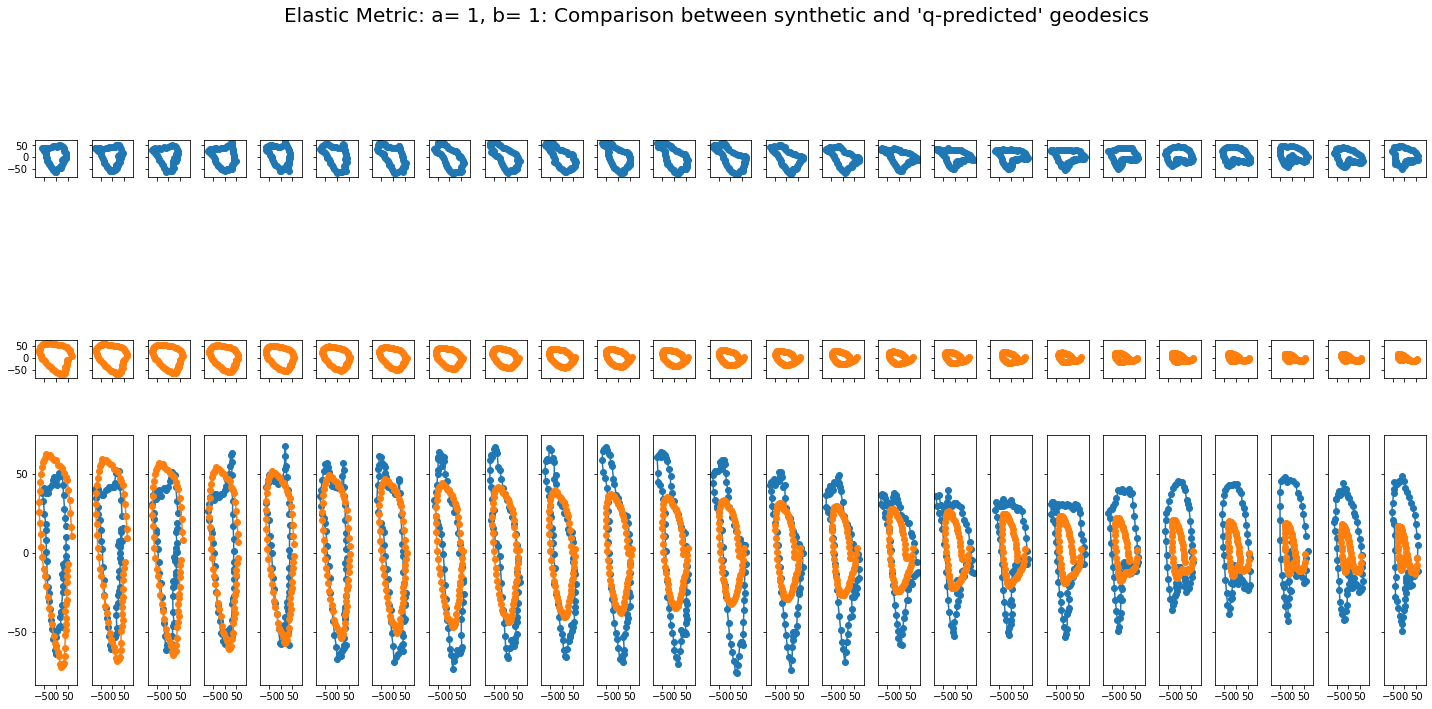

In [151]:
trajectory= shapes_traj[4]
a_opt, b_opt, r2_opt = qfit.optimize_ab_linear(trajectory)
print(a_opt, b_opt, r2_opt)
qfit.ftrans_plot_predictions(trajectory,a=1,b=1,split=False)

## 4.5 Testing geodesic 5

1 0.5 0.06559709945988632


/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:212: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  geodesic_array= np.array([geodesic[half_n_times:],recentered_curves])
/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:212: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  geodesic_array= np.array([geodesic[half_n_times:],recentered_curves])


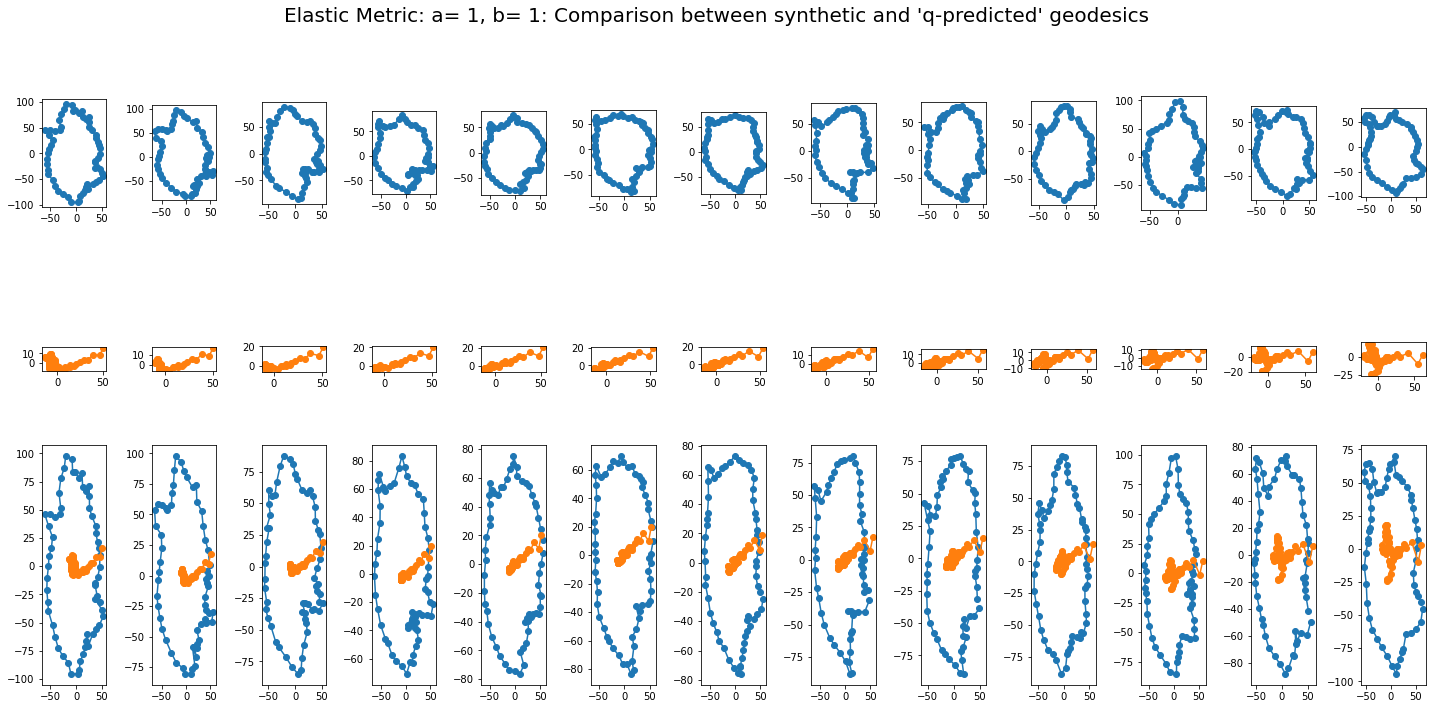

In [152]:
trajectory= shapes_traj[5]
a_opt, b_opt, r2_opt = qfit.optimize_ab_linear(trajectory)
print(a_opt, b_opt, r2_opt)
qfit.ftrans_plot_predictions(trajectory,a=1,b=1,split=True)

1 0.5 0.06559709945988632


/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:264: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  geodesic_array= np.array([geodesic,recentered_curves])
/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:264: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  geodesic_array= np.array([geodesic,recentered_curves])


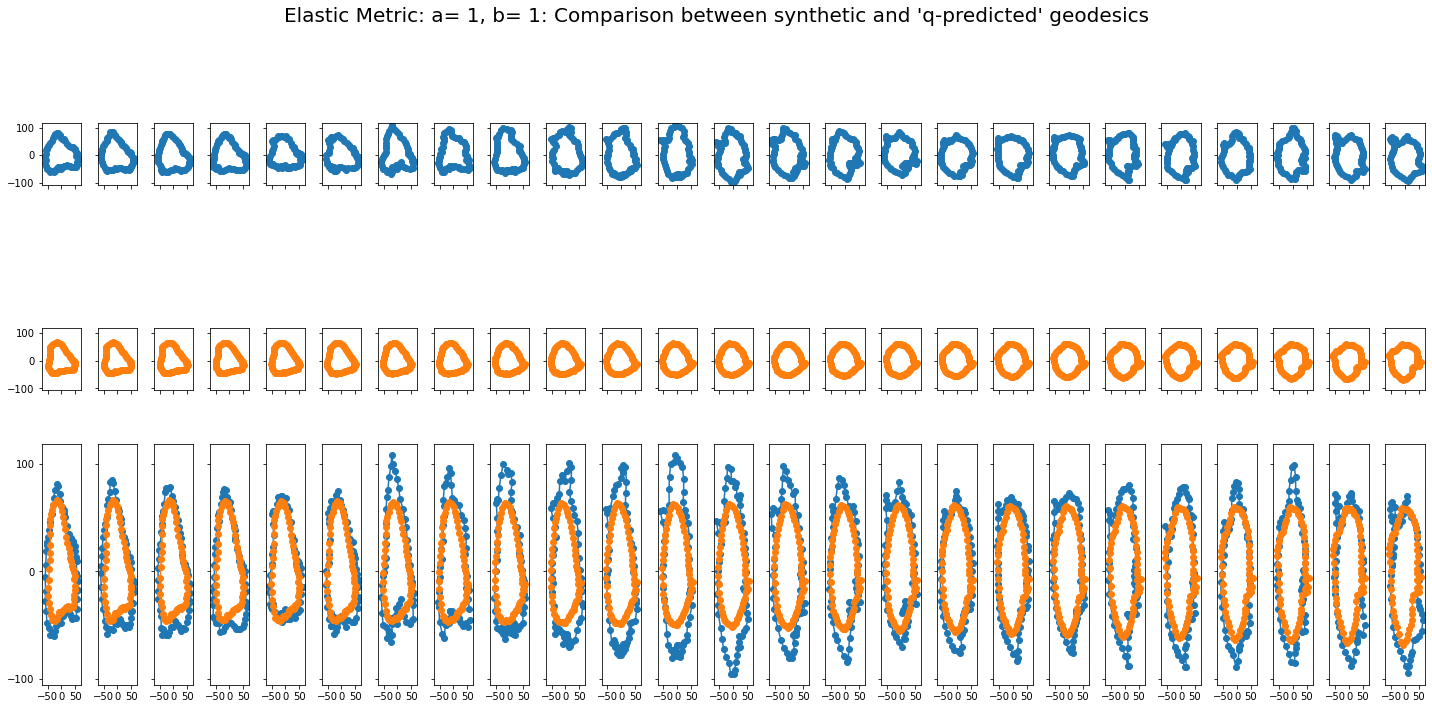

In [153]:
trajectory= shapes_traj[5]
a_opt, b_opt, r2_opt = qfit.optimize_ab_linear(trajectory)
print(a_opt, b_opt, r2_opt)
qfit.ftrans_plot_predictions(trajectory,a=1,b=1,split=False)

## 4.6 Testing geodesic 6

0.01 0.5 0.11275999159572263


/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:212: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  geodesic_array= np.array([geodesic[half_n_times:],recentered_curves])
/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:212: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  geodesic_array= np.array([geodesic[half_n_times:],recentered_curves])


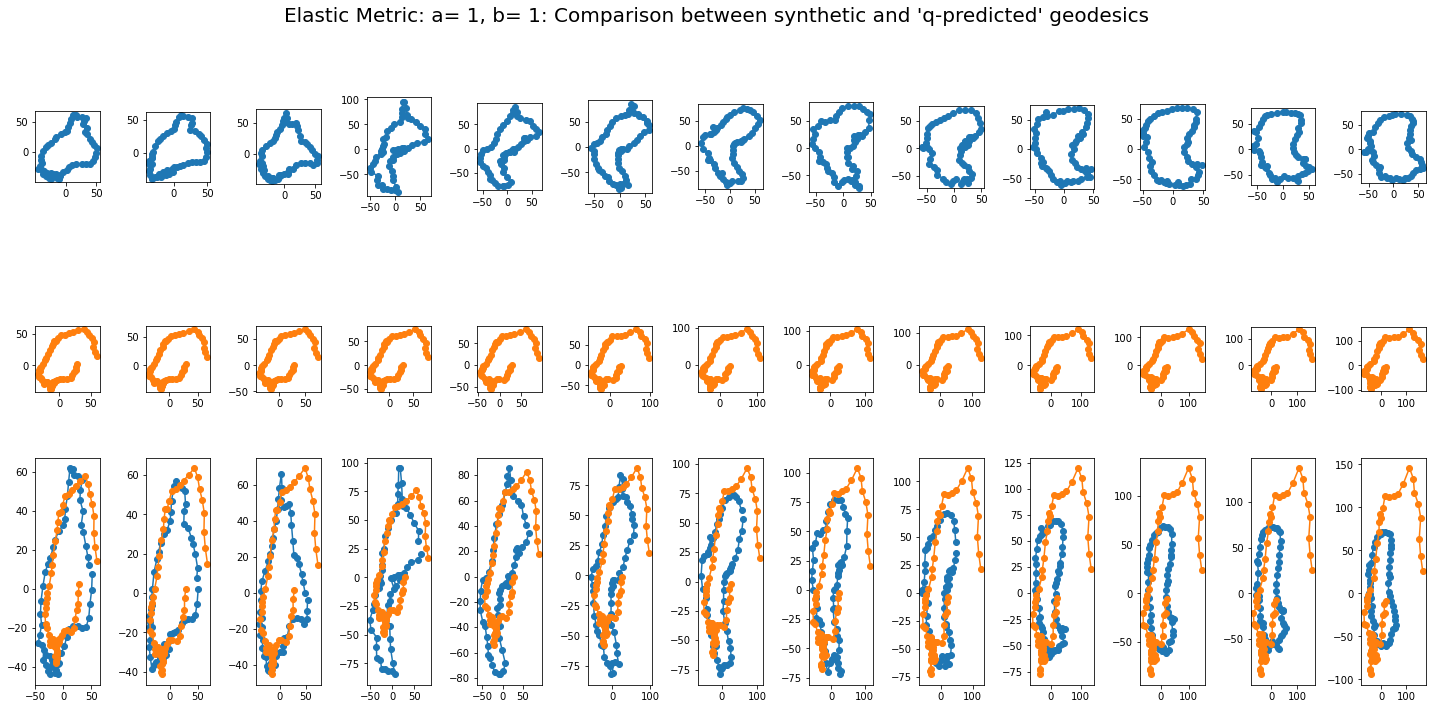

In [154]:
trajectory= shapes_traj[6]
a_opt, b_opt, r2_opt = qfit.optimize_ab_linear(trajectory)
print(a_opt, b_opt, r2_opt)
qfit.ftrans_plot_predictions(trajectory,a=1,b=1,split=True)

0.01 0.5 0.11275999159572263


/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:264: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  geodesic_array= np.array([geodesic,recentered_curves])
/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:264: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  geodesic_array= np.array([geodesic,recentered_curves])


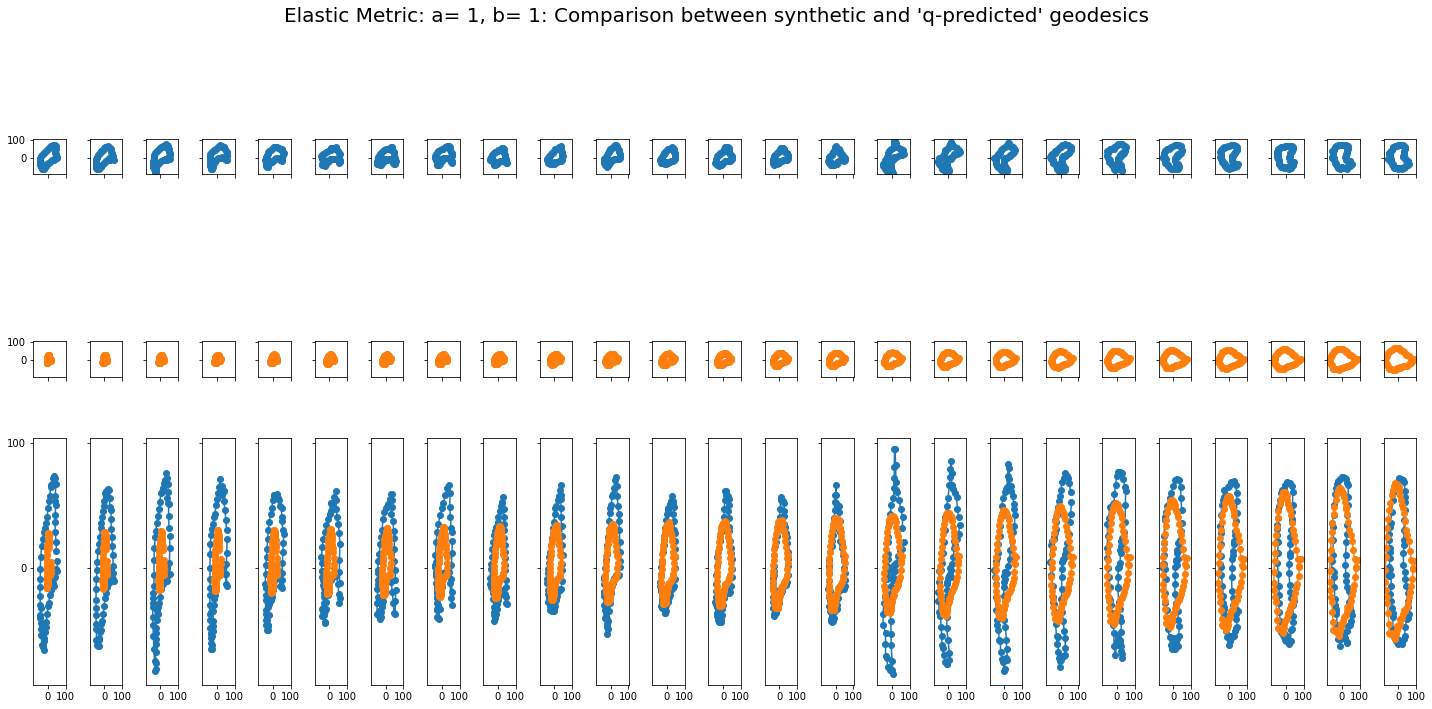

In [155]:
trajectory= shapes_traj[6]
a_opt, b_opt, r2_opt = qfit.optimize_ab_linear(trajectory)
print(a_opt, b_opt, r2_opt)
qfit.ftrans_plot_predictions(trajectory,a=1,b=1,split=False)

## 4.7 Testing geodesic 7

0.25 0.5 0.1071604121851614


/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:212: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  geodesic_array= np.array([geodesic[half_n_times:],recentered_curves])
/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:212: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  geodesic_array= np.array([geodesic[half_n_times:],recentered_curves])


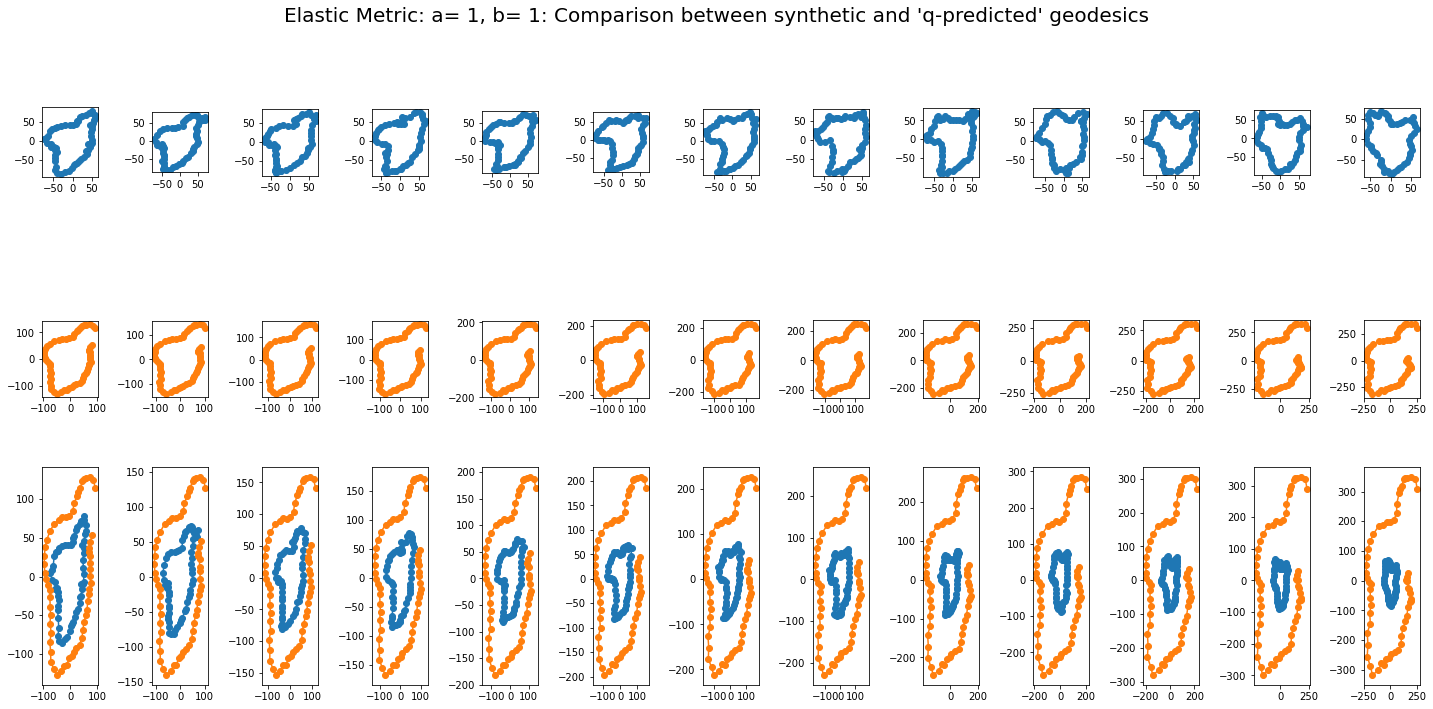

In [156]:
trajectory= shapes_traj[7]
a_opt, b_opt, r2_opt = qfit.optimize_ab_linear(trajectory)
print(a_opt, b_opt, r2_opt)
qfit.ftrans_plot_predictions(trajectory,a=1,b=1,split=True)

0.25 0.5 0.1071604121851614


/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:264: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  geodesic_array= np.array([geodesic,recentered_curves])
/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:264: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  geodesic_array= np.array([geodesic,recentered_curves])


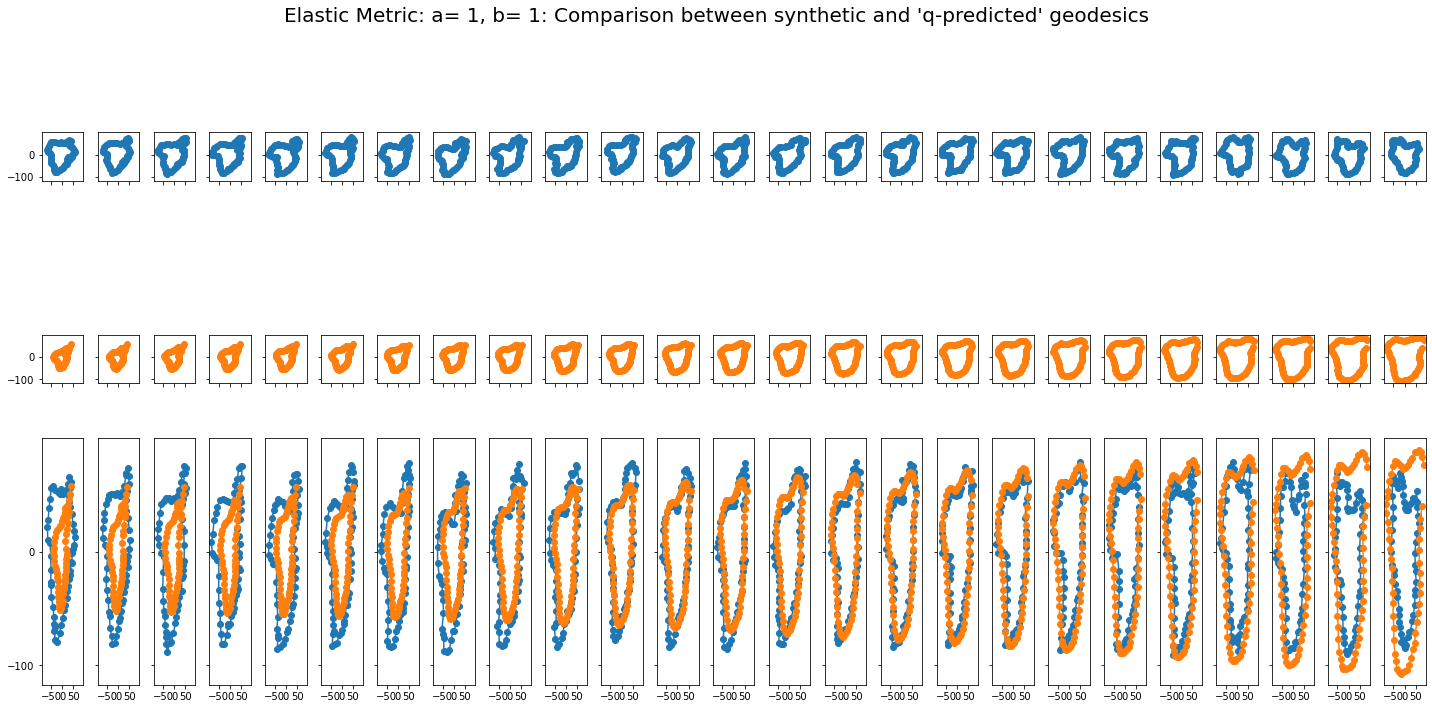

In [157]:
trajectory= shapes_traj[7]
a_opt, b_opt, r2_opt = qfit.optimize_ab_linear(trajectory)
print(a_opt, b_opt, r2_opt)
qfit.ftrans_plot_predictions(trajectory,a=1,b=1,split=False)

## 4.8 Testing geodesic 8

1.4 2 0.07122362178804052


/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:212: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  geodesic_array= np.array([geodesic[half_n_times:],recentered_curves])
/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:212: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  geodesic_array= np.array([geodesic[half_n_times:],recentered_curves])


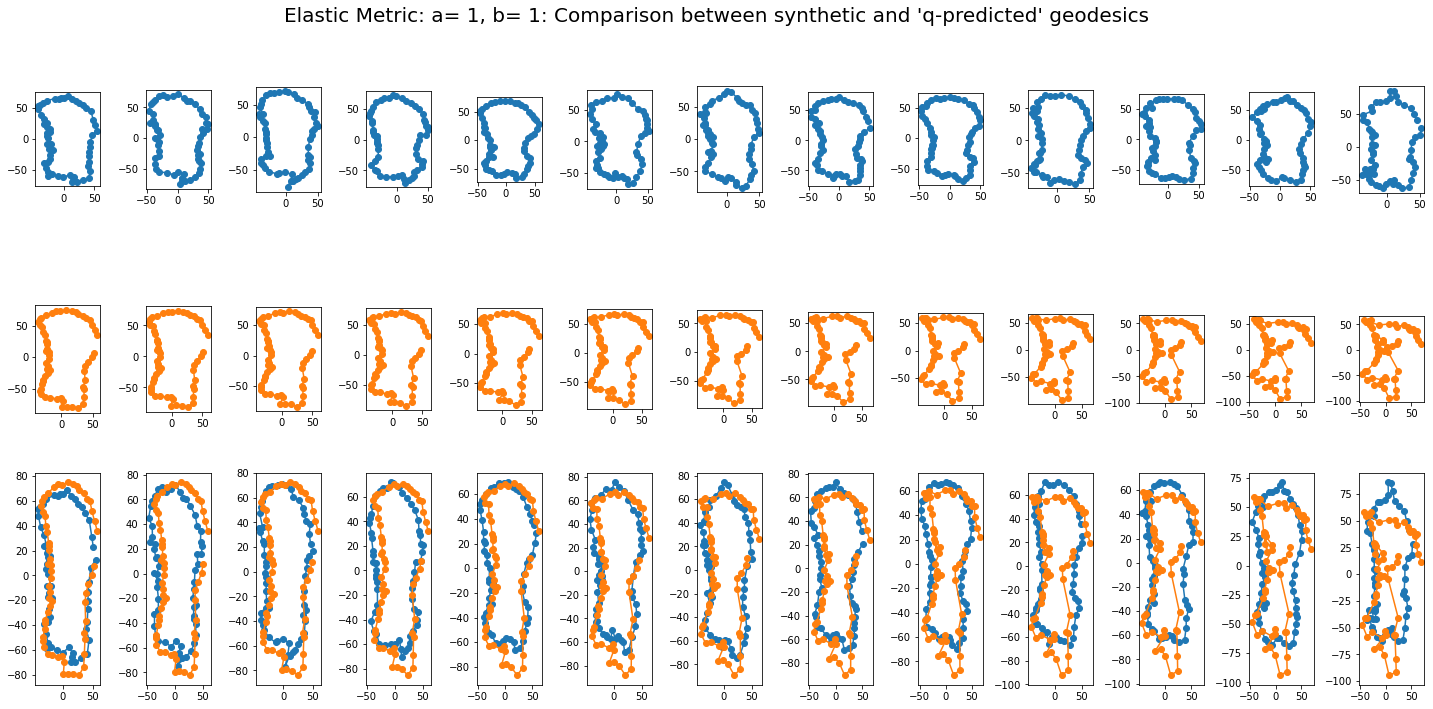

In [158]:
trajectory= shapes_traj[8]
a_opt, b_opt, r2_opt = qfit.optimize_ab_linear(trajectory)
print(a_opt, b_opt, r2_opt)
qfit.ftrans_plot_predictions(trajectory,a=1,b=1,split=True)

1.4 2 0.07122362178804052


/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:264: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  geodesic_array= np.array([geodesic,recentered_curves])
/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:264: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  geodesic_array= np.array([geodesic,recentered_curves])


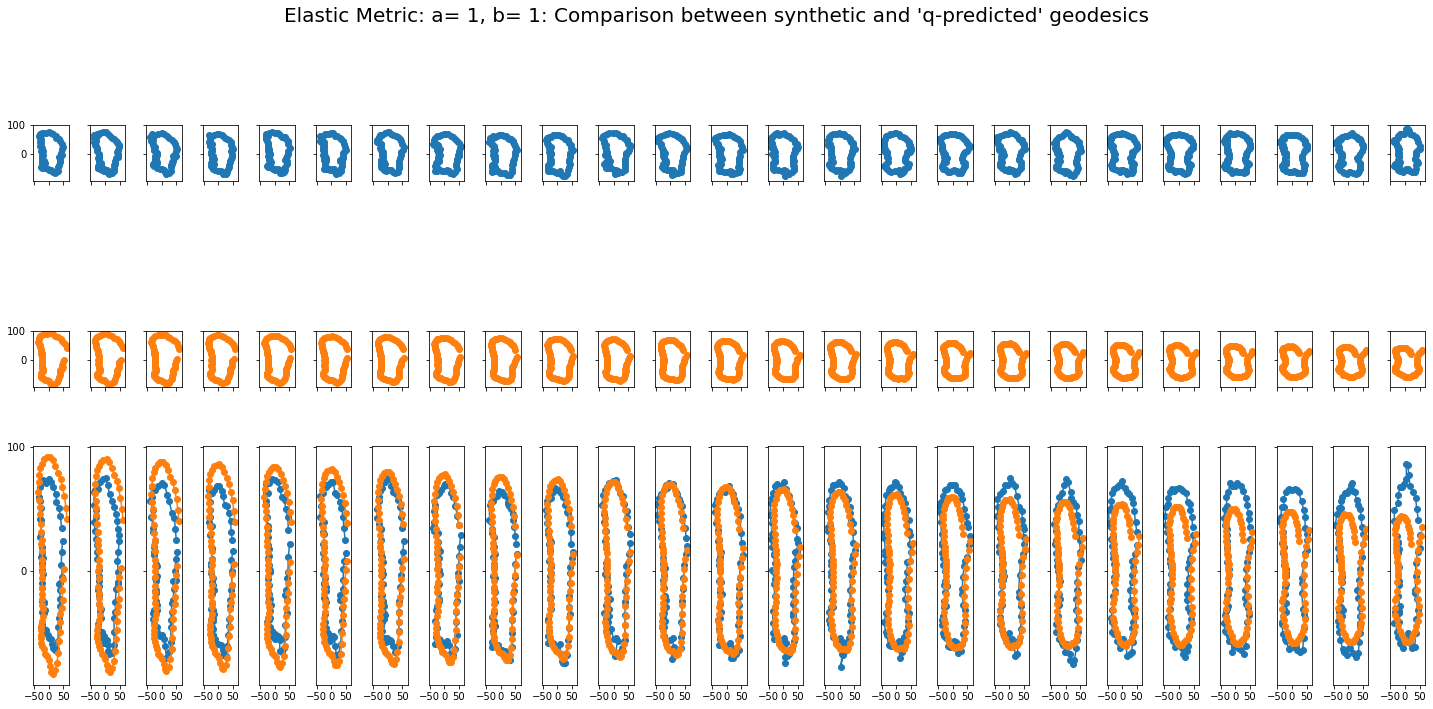

In [159]:
trajectory= shapes_traj[8]
a_opt, b_opt, r2_opt = qfit.optimize_ab_linear(trajectory)
print(a_opt, b_opt, r2_opt)
qfit.ftrans_plot_predictions(trajectory,a=1,b=1,split=False)

## 4.9 Testing geodesic 9

0.5 0.5 0.14077532487062244


/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:212: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  geodesic_array= np.array([geodesic[half_n_times:],recentered_curves])
/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:212: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  geodesic_array= np.array([geodesic[half_n_times:],recentered_curves])


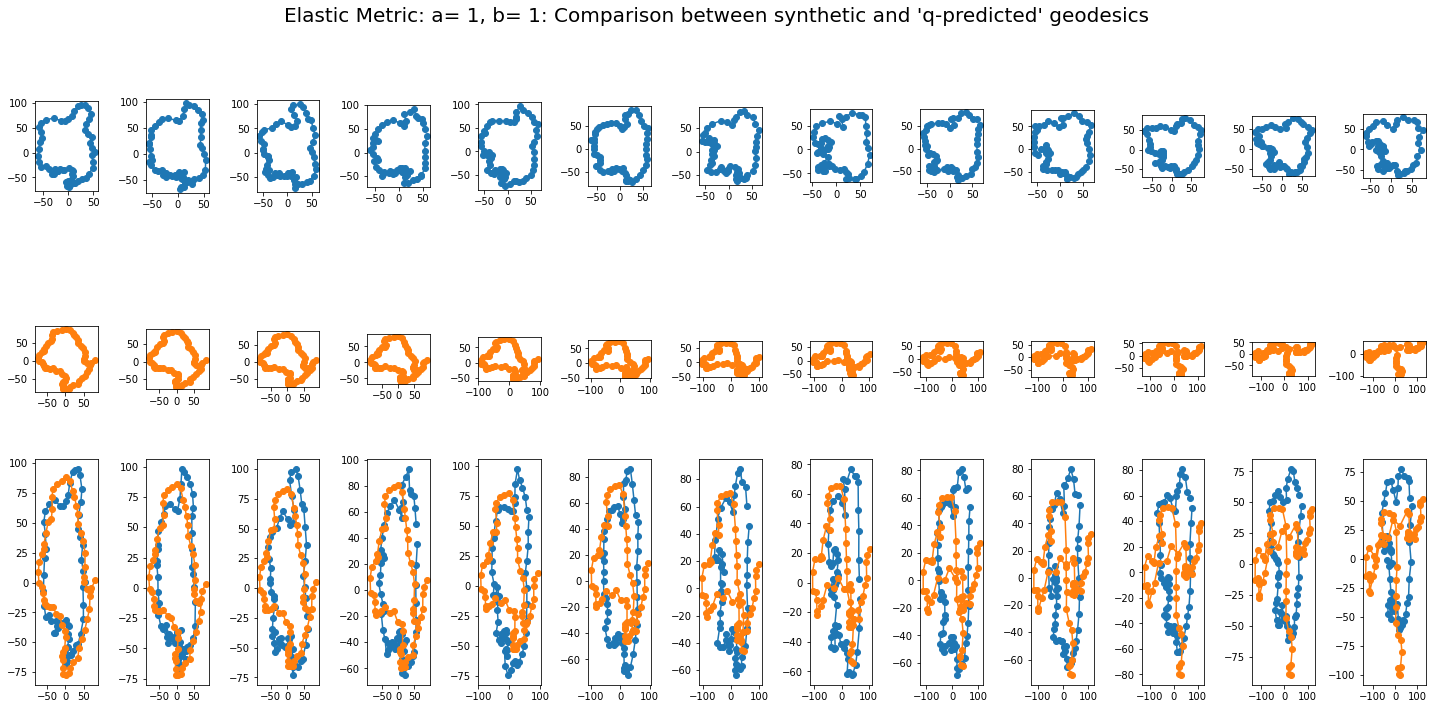

In [160]:
trajectory= shapes_traj[9]
a_opt, b_opt, r2_opt = qfit.optimize_ab_linear(trajectory)
print(a_opt, b_opt, r2_opt)
qfit.ftrans_plot_predictions(trajectory,a=1,b=1,split=True)

0.5 0.5 0.14077571228560629


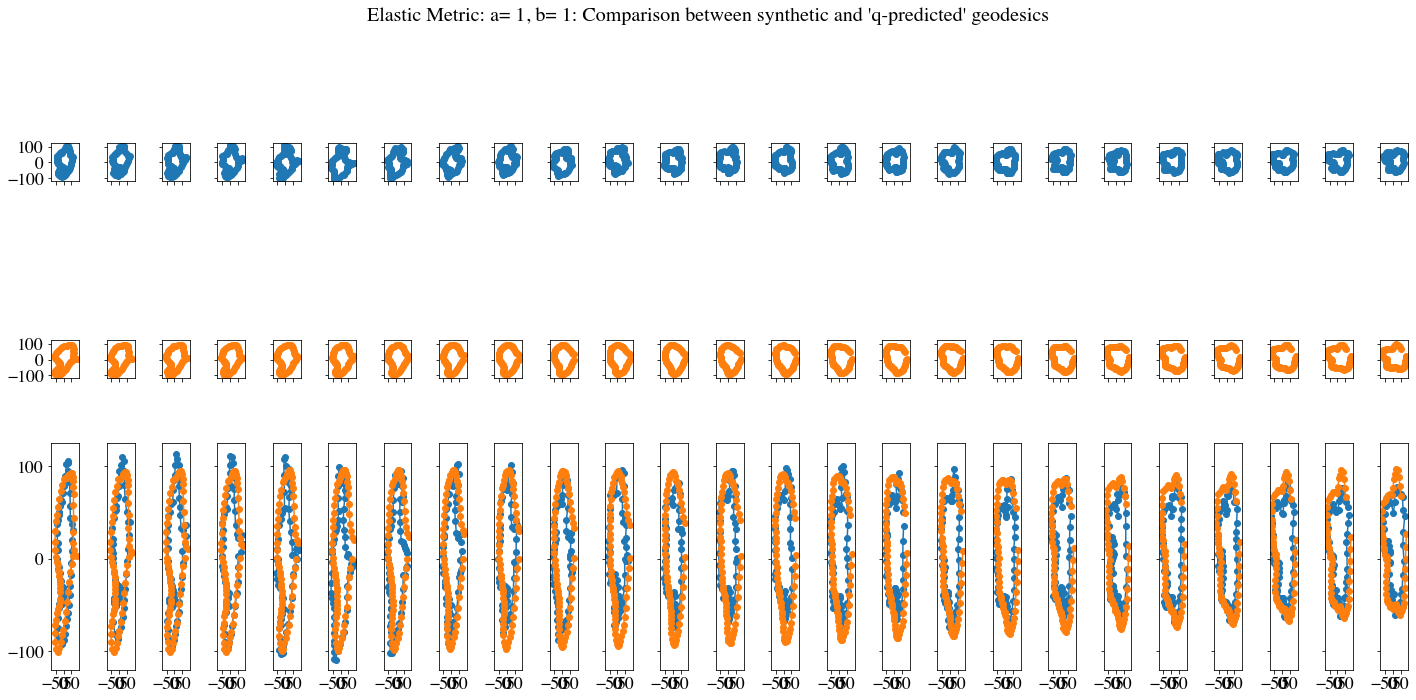

In [38]:
trajectory= shapes_traj[9]
a_opt, b_opt, r2_opt = qfit.optimize_ab_linear(trajectory)
print(a_opt, b_opt, r2_opt)
qfit.ftrans_plot_predictions(trajectory,a=1,b=1,split=False)

## 4.10 Testing geodesic 10

1 0.5 0.09410663086450645


/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:212: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  geodesic_array= np.array([geodesic[half_n_times:],recentered_curves])
/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:212: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  geodesic_array= np.array([geodesic[half_n_times:],recentered_curves])


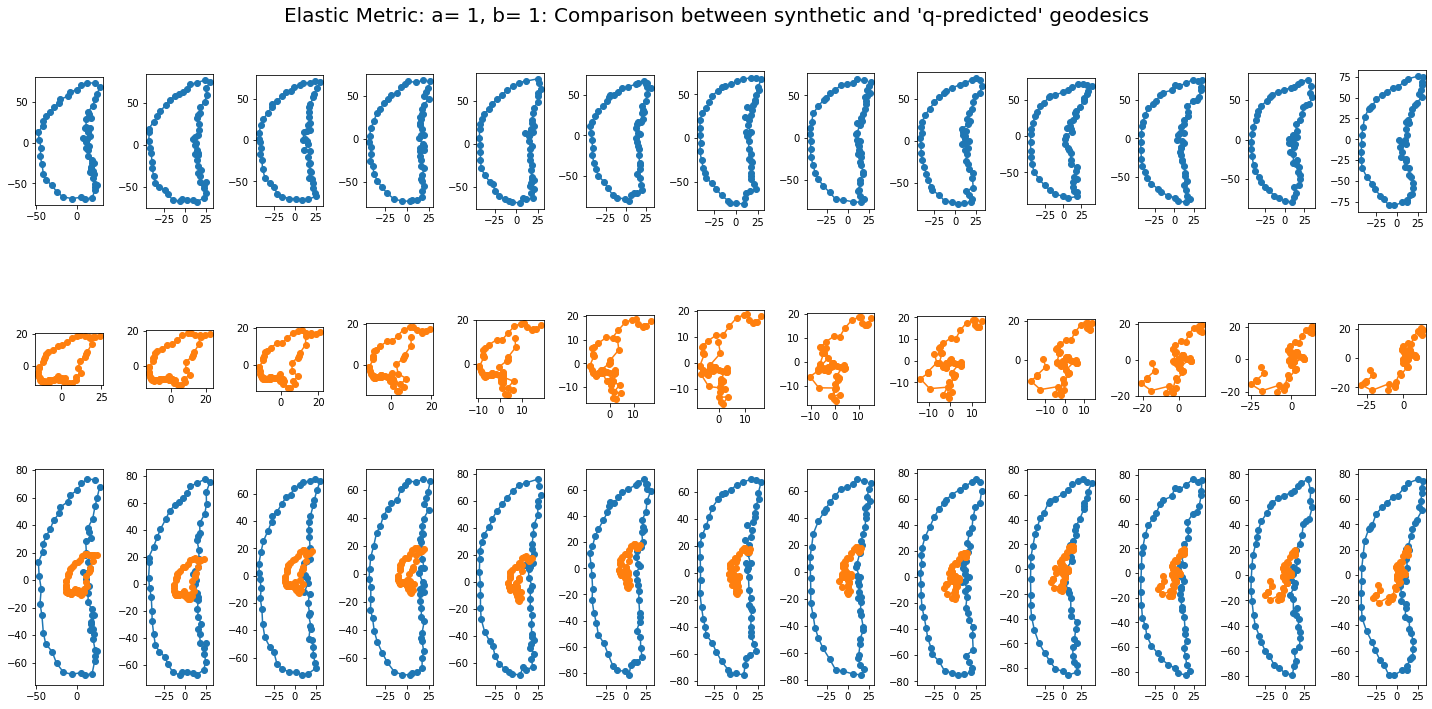

In [162]:
trajectory= shapes_traj[10]
a_opt, b_opt, r2_opt = qfit.optimize_ab_linear(trajectory)
print(a_opt, b_opt, r2_opt)
qfit.ftrans_plot_predictions(trajectory,a=1,b=1,split=True)

1 0.5 0.09410663086450645


/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:264: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  geodesic_array= np.array([geodesic,recentered_curves])
/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:264: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  geodesic_array= np.array([geodesic,recentered_curves])


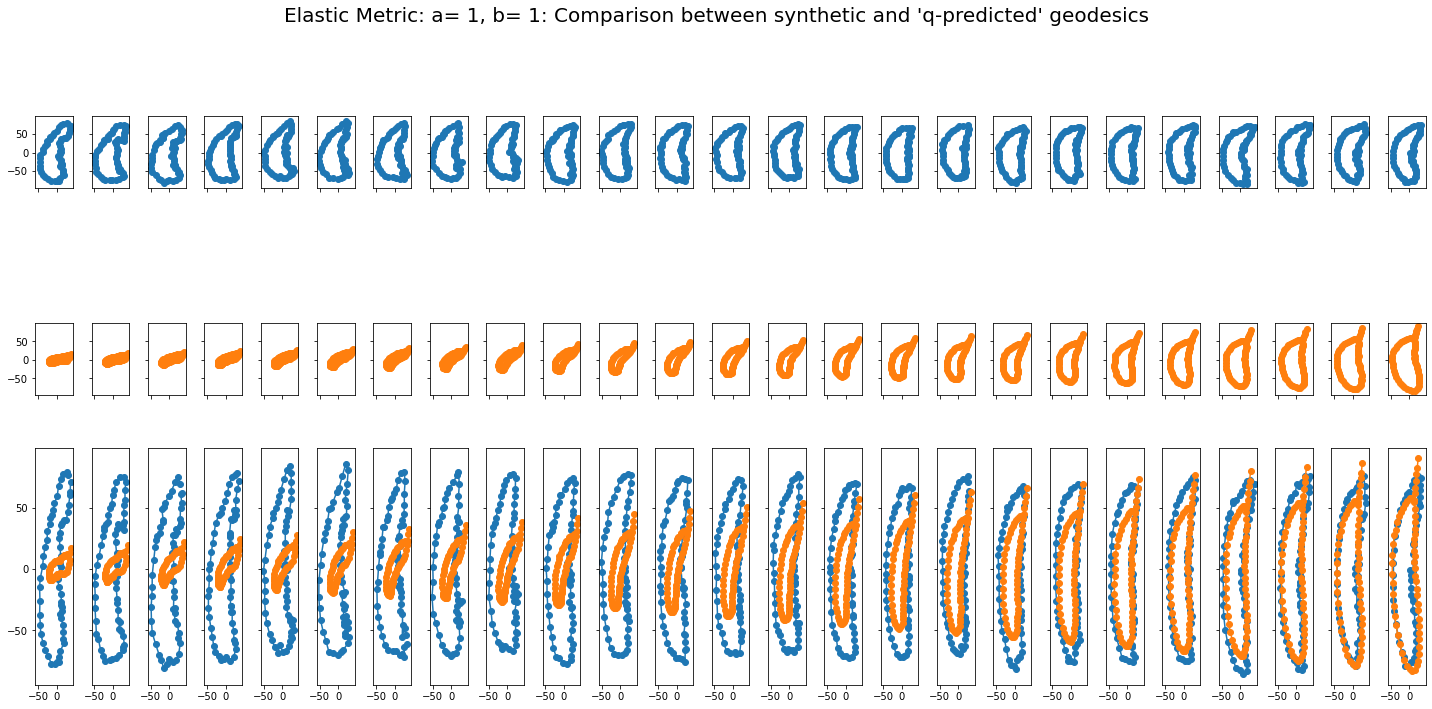

In [163]:
trajectory= shapes_traj[10]
a_opt, b_opt, r2_opt = qfit.optimize_ab_linear(trajectory)
print(a_opt, b_opt, r2_opt)
qfit.ftrans_plot_predictions(trajectory,a=1,b=1,split=False)

## 4.13 Testing geodesic 13

0.75 0.5 0.09792929918705623


/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:212: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  geodesic_array= np.array([geodesic[half_n_times:],recentered_curves])
/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:212: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  geodesic_array= np.array([geodesic[half_n_times:],recentered_curves])


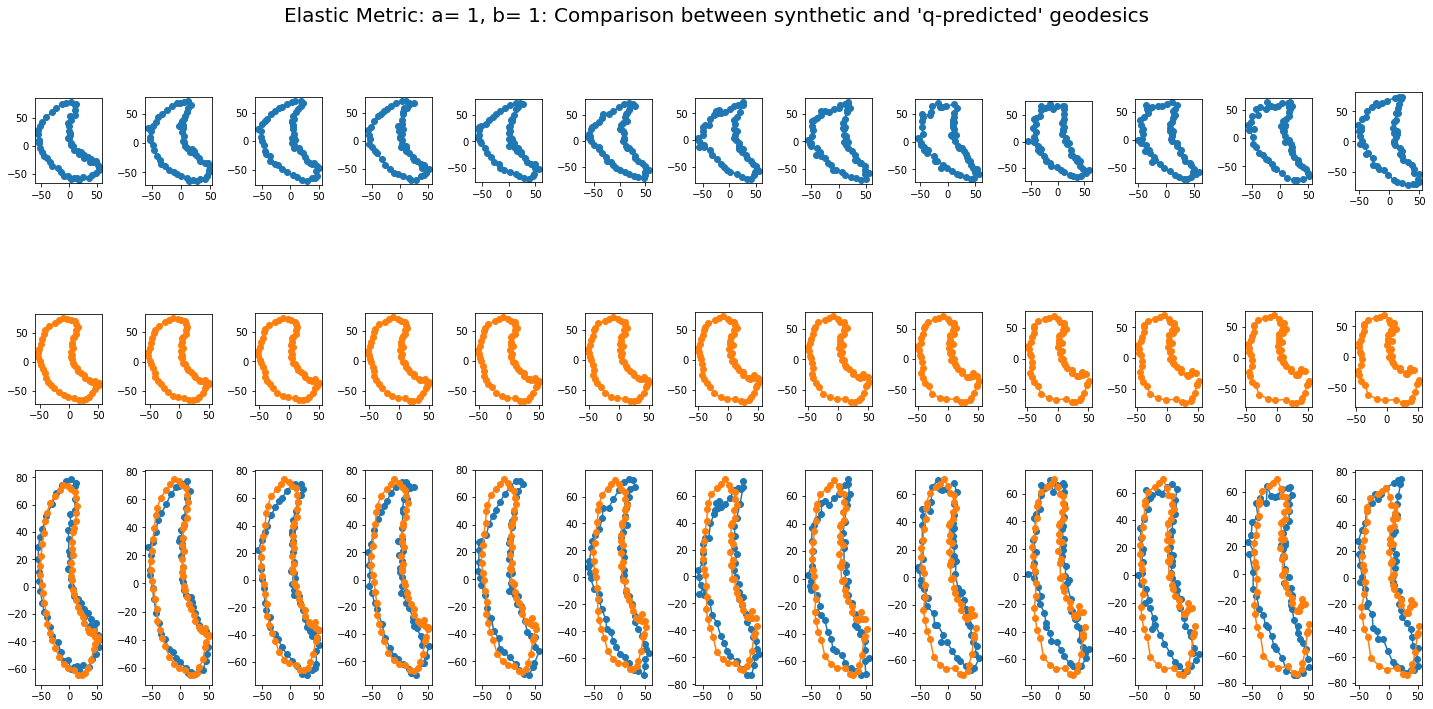

In [164]:
trajectory= shapes_traj[13]
a_opt, b_opt, r2_opt = qfit.optimize_ab_linear(trajectory)
print(a_opt, b_opt, r2_opt)
qfit.ftrans_plot_predictions(trajectory,a=1,b=1,split=True)

0.75 0.5 0.09792929918705623


/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:264: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  geodesic_array= np.array([geodesic,recentered_curves])
/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:264: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  geodesic_array= np.array([geodesic,recentered_curves])


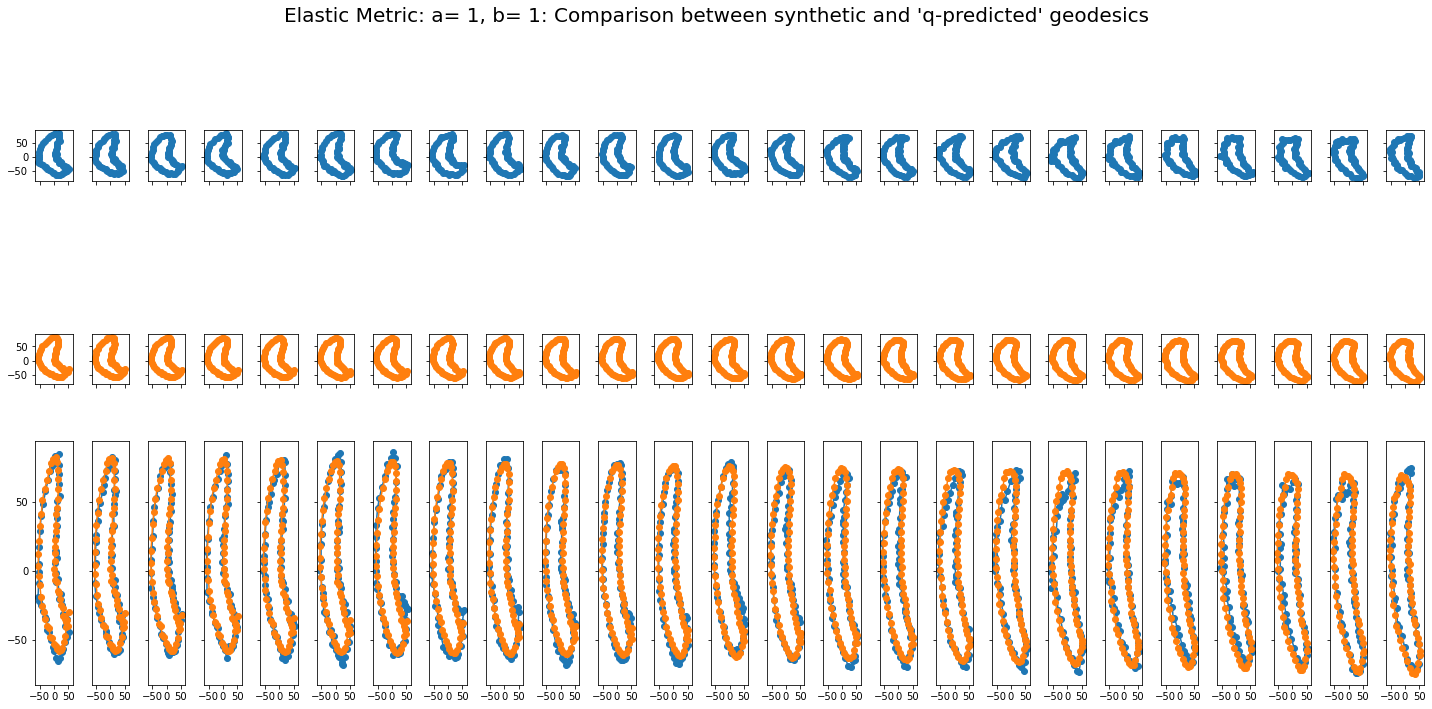

In [165]:
trajectory= shapes_traj[13]
a_opt, b_opt, r2_opt = qfit.optimize_ab_linear(trajectory)
print(a_opt, b_opt, r2_opt)
qfit.ftrans_plot_predictions(trajectory,a=1,b=1,split=False)

## 4.11 Section conclusion

There are actually 16 geodesics but i don't feel like looking at them because i feel like we have gained enough information from these 11.

It looks like
- some trajectories are better fit than others
- some $\textbf{parts}$ of some trajectories are also better fit than others

$\textbf{This raises a new question:}$ If whole trajectories do not follow geodesics, are there $\textbf{sections} of a trajectory that DO follow geodesics????
- this data has a bunch of growing and receding protrusions (that is how cells move). 
- maybe the trajectories would follow geodesics during the time that the cell is growing/receding ONE protrusion at a time?
- maybe during one motion, cells follow geodesics? (until they change motion)
- this would make sense because if the cell is moving "effortlessly", then it should move smoothly along the easiest path

# 5. Investigating whether portions of the trajectories might follow geodesics

I have looked at the data and identified segments where there is only one protrusion extending or retracting. i will see if these bits of video follow geodesics.

The frames:

{2}: 1-14

{3}: 1-14

{6}: 1-15

{7}: 7-17

{8}: 1-21

{9}: 1-25

{11}: 1-25

{13}: 1-25

## Trajectory #2

1 0.5 0.09384282399462483


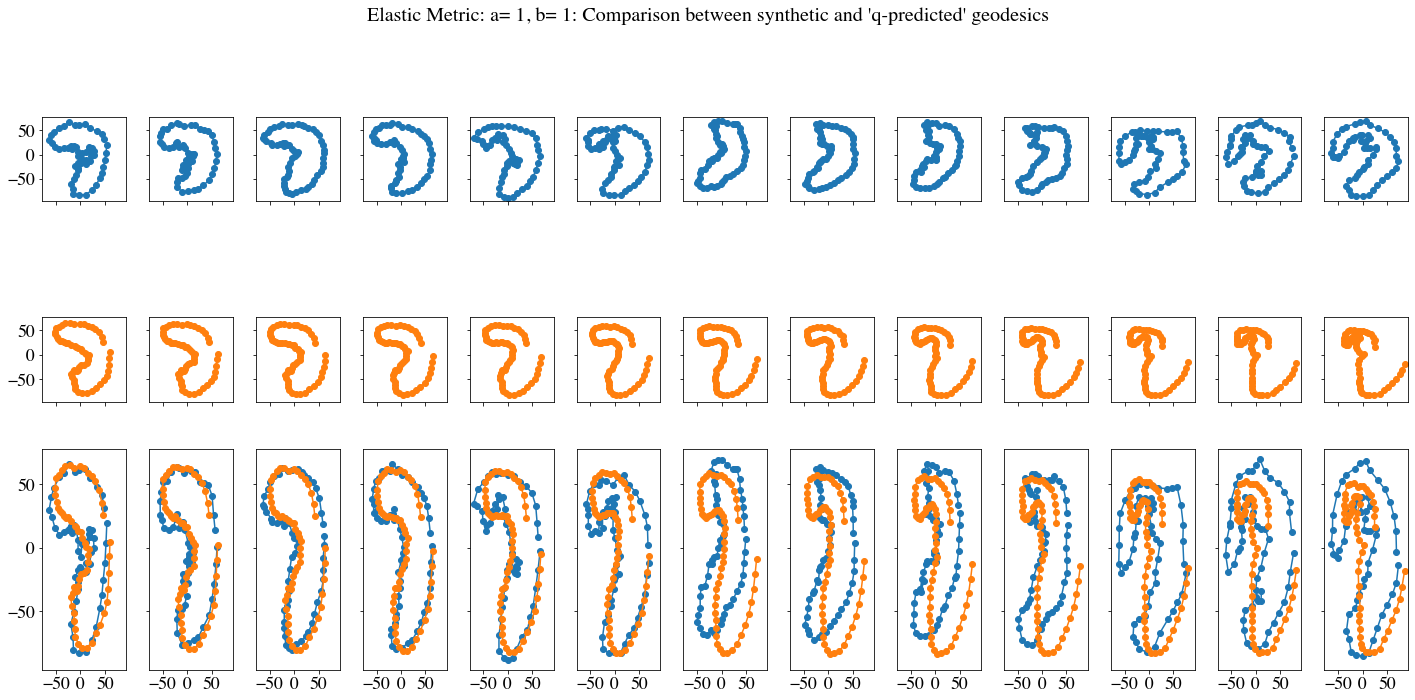

In [35]:
trajectory= shapes_traj[2][1:14]
a_opt, b_opt, r2_opt = qfit.optimize_ab_linear(trajectory)
print(a_opt, b_opt, r2_opt)
qfit.ftrans_plot_predictions(trajectory,a=1,b=1,split=False)

## Trajectory #3

1 0.5 0.1192429500426392


/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:264: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  geodesic_array= np.array([geodesic,recentered_curves])
/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:264: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  geodesic_array= np.array([geodesic,recentered_curves])


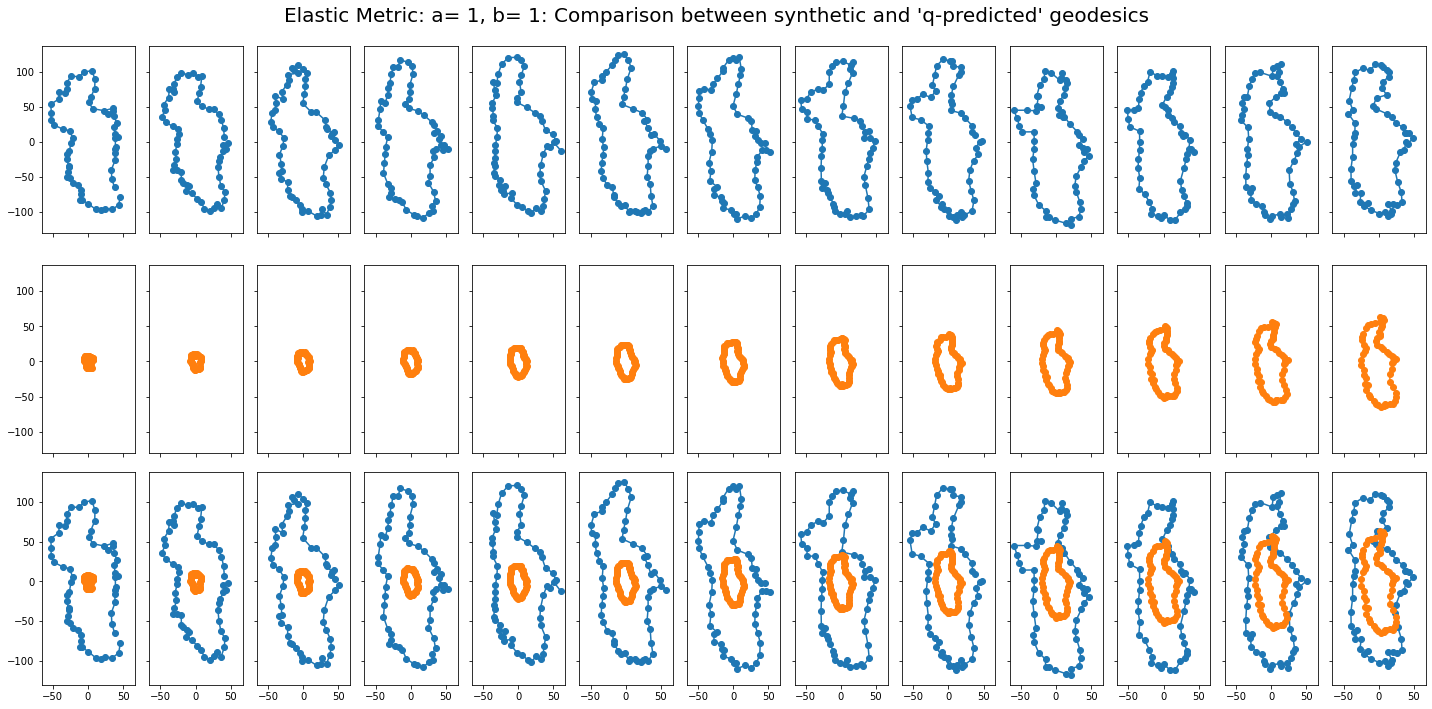

In [170]:
trajectory= shapes_traj[3][1:14]
a_opt, b_opt, r2_opt = qfit.optimize_ab_linear(trajectory)
print(a_opt, b_opt, r2_opt)
qfit.ftrans_plot_predictions(trajectory,a=1,b=1,split=False)

## Trajectory #3

0.25 0.5 0.29947952545000345


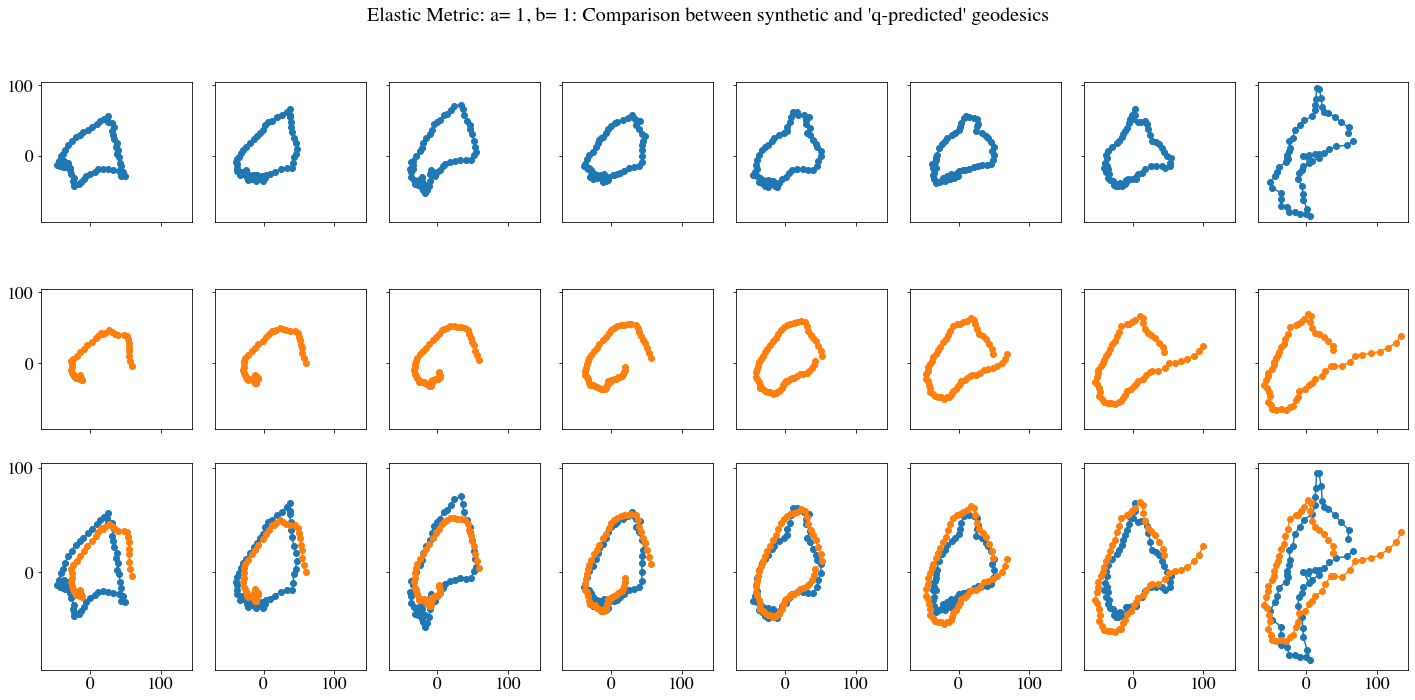

In [36]:
trajectory= shapes_traj[6][8:16]
a_opt, b_opt, r2_opt = qfit.optimize_ab_linear(trajectory)
print(a_opt, b_opt, r2_opt)
qfit.ftrans_plot_predictions(trajectory,a=1,b=1,split=False)

## Trajectory #6

1.6 2 0.19707162042615675


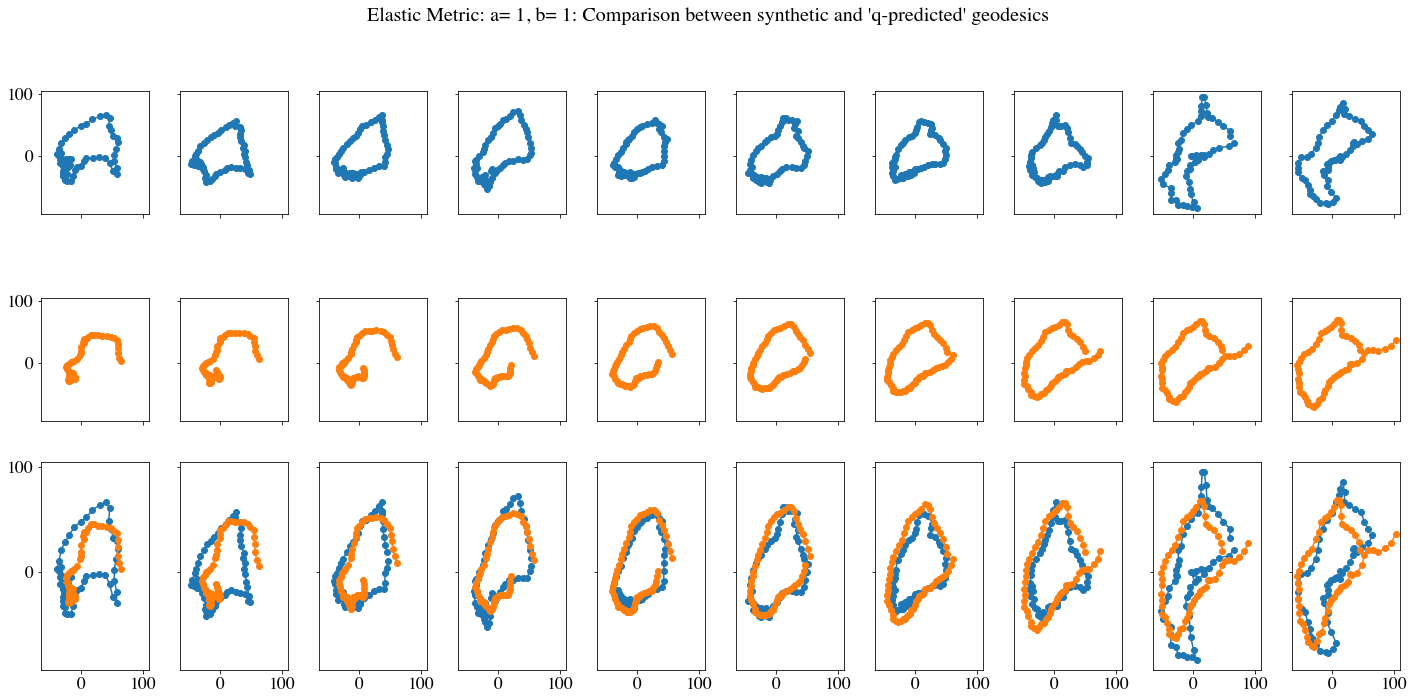

In [37]:
trajectory= shapes_traj[6][7:17]
a_opt, b_opt, r2_opt = qfit.optimize_ab_linear(trajectory)
print(a_opt, b_opt, r2_opt)
qfit.ftrans_plot_predictions(trajectory,a=1,b=1,split=False)

## Trajectory #9

0.5 0.5 0.14841557473440178


/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:264: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  geodesic_array= np.array([geodesic,recentered_curves])
/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:264: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  geodesic_array= np.array([geodesic,recentered_curves])


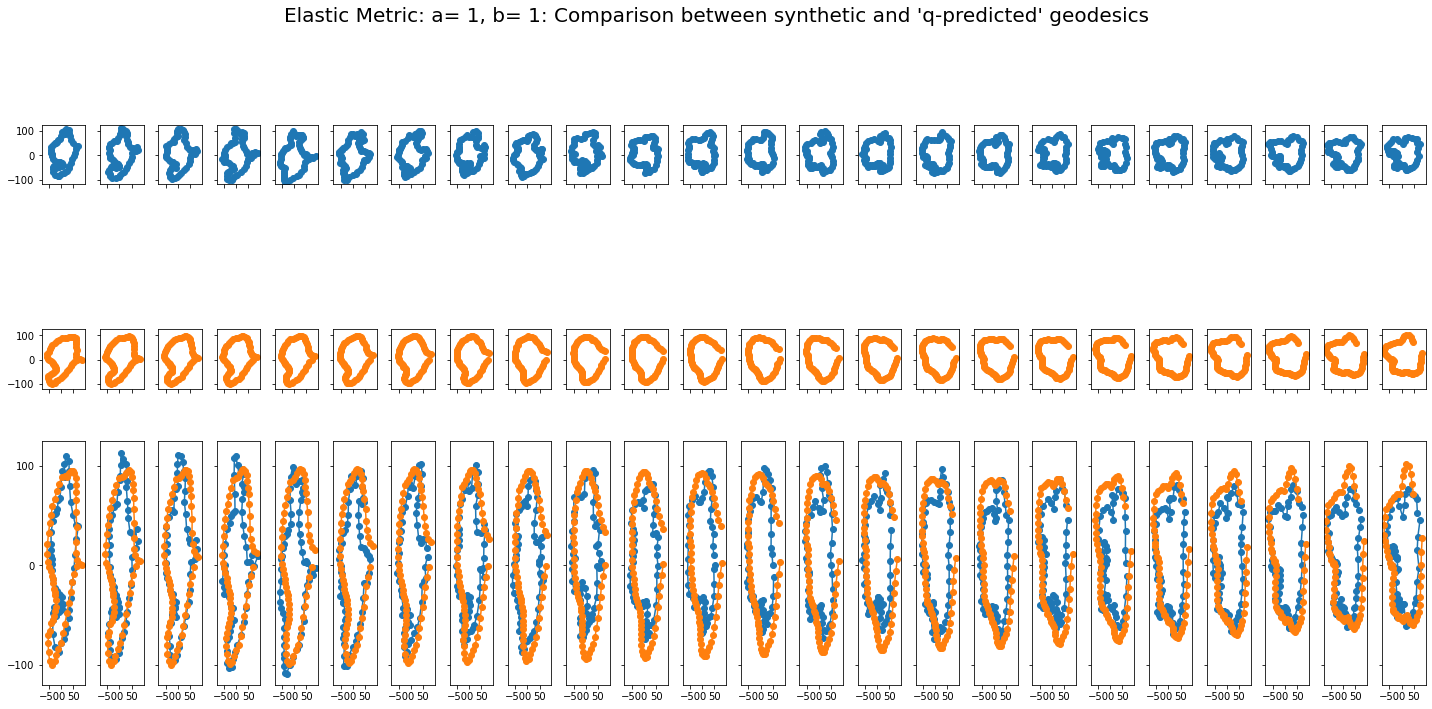

In [173]:
trajectory= shapes_traj[9][1:25]
a_opt, b_opt, r2_opt = qfit.optimize_ab_linear(trajectory)
print(a_opt, b_opt, r2_opt)
qfit.ftrans_plot_predictions(trajectory,a=1,b=1,split=False)

## Trajectory #11

0.75 0.5 0.07553855312152416


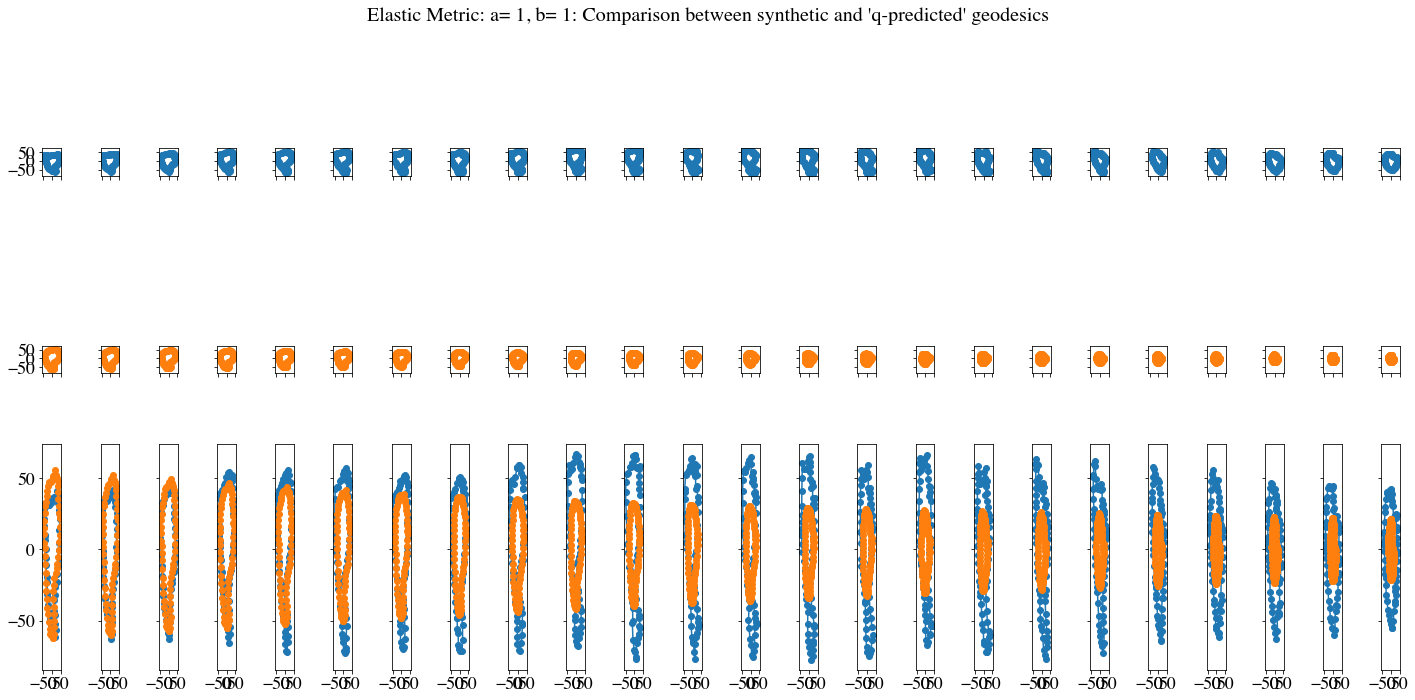

In [23]:
trajectory= shapes_traj[11][1:25]
a_opt, b_opt, r2_opt = qfit.optimize_ab_linear(trajectory)
print(a_opt, b_opt, r2_opt)
qfit.ftrans_plot_predictions(trajectory,a=1,b=1,split=False)

## Reflections

1. it looks like we could benefit from making the "re-scaling" thing work
2. It also seems like the shapes being produced arent even real shapes. not good shapes. so maybe the problem has more to do with our software and less to do with the shapes not following geodesics??? 

# What about polynomial regression?

current error happening because length of x and length of y do not match in polynomial regression.
in previous sklearn model, data takes x (training data) and y (real data).

now, x and y both need to be 1d arrays.

reminder of what q is.

first, we have geodesic, which contains the coordinates of each point in the curve, for some number of time slices.
then, we transform this geodesic into q space, so now q 

shape of geodesic: (25, 60, 2) 25 time slices, 60 points, 2 coordinate values for each point.
shape of q: (25, 59, 2) same, except 59 points.

shape of times: (25,).

(25, 60, 2)
(25, 59, 2)
7.992062348156303
0.15863498412003182


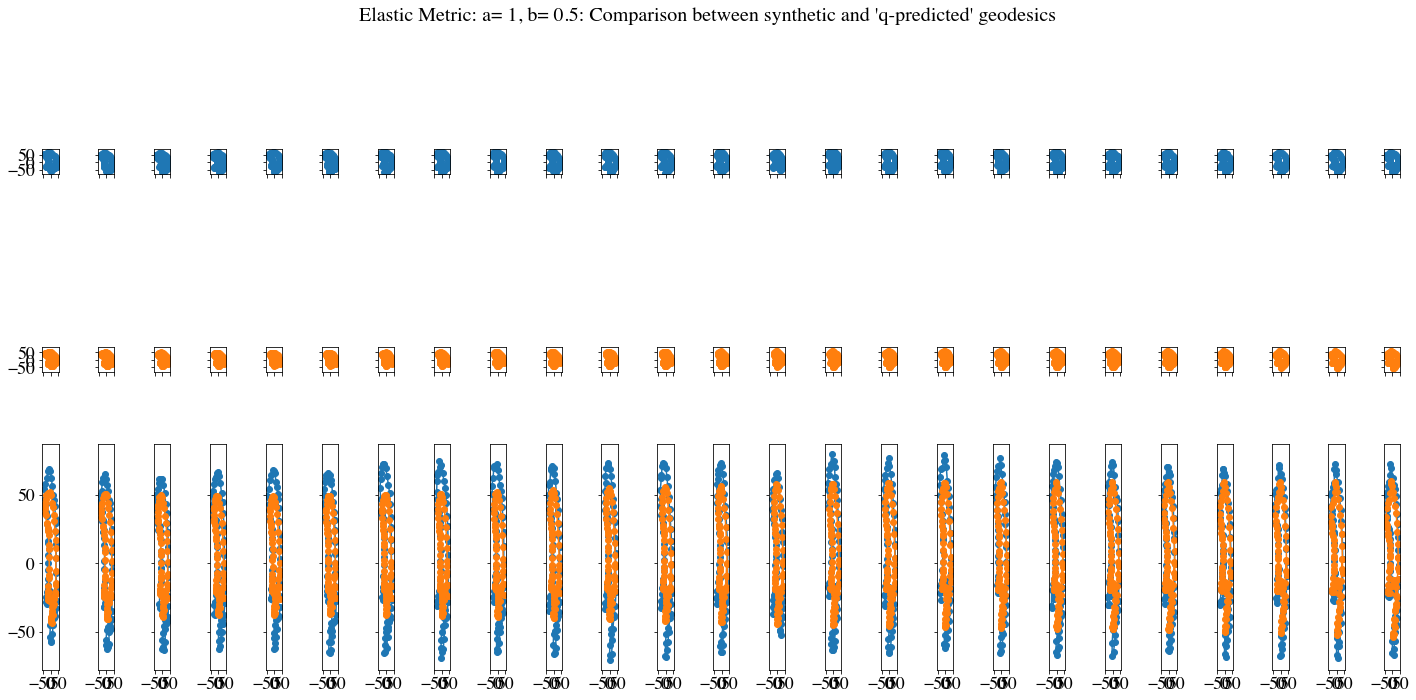

In [232]:
import importlib
importlib.reload(qfit)

qfit.ftrans_plot_predictions_nongeodesic(shapes_traj[0],a=1,b=.5,degree = 2, split=False)

# Now, we will switch gears to metric optimization/ metric learning.

note to self: in order for gradient descent to work, the function must be convex: https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21

In [252]:
import importlib
importlib.reload(optimize_am)

optimize_am.find_best_am(shapes_traj[0], init_a = 0.2)

[ 1  2  3  4  5  6  7  8  9 10]
[11 12 13 14 15 16 17 18 19 20]
[21 22 23 24 25]
a: 0.2 r2_val: -0.48871154574301845 mse_val: 231.6826756752227 var_val: 155.626304059857 mse_train: 158.3188876025511
degree: 1; best a: 0.2;r2: -0.48871154574301845 ; r2_GT: -0.5918635530854821
a: 0.2 r2_val: -3.835415599397023 mse_val: 752.5178583275368 var_val: 155.626304059857 mse_train: 206.15787860843662
degree: 2; best a: 0.2;r2: -3.835415599397023 ; r2_GT: -0.5918635530854821
a: 0.2 r2_val: -166.60738154591075 mse_val: 26084.117323140374 var_val: 155.626304059857 mse_train: 1102.2993003700278
degree: 3; best a: 0.2;r2: -166.60738154591075 ; r2_GT: -0.5918635530854821
a: 0.2 r2_val: -7175.790005255444 mse_val: 1116897.3035316265 var_val: 155.626304059857 mse_train: 10290.156807004536
degree: 4; best a: 0.2;r2: -7175.790005255444 ; r2_GT: -0.5918635530854821
a: 0.2 r2_val: -503672.5571355134 mse_val: 78384854.14968117 var_val: 155.626304059857 mse_train: 193066.56432602945
degree: 5; best a: 0.2;r2: 

In [253]:
optimize_am.find_best_am(shapes_traj[0], init_a = 0.5)

[ 1  2  3  4  5  6  7  8  9 10]
[11 12 13 14 15 16 17 18 19 20]
[21 22 23 24 25]
a: 0.5 r2_val: -0.6310028566639387 mse_val: 841.8460990056681 var_val: 516.1524368679428 mse_train: 532.7633687713841
degree: 1; best a: 0.5;r2: -0.6310028566639387 ; r2_GT: -0.5918635530854821
a: 0.5 r2_val: -3.6089689081866485 mse_val: 2378.9305334091205 var_val: 516.1524368679428 mse_train: 683.445122059141
degree: 2; best a: 0.5;r2: -3.6089689081866485 ; r2_GT: -0.5918635530854821
a: 0.5 r2_val: -146.411729502399 mse_val: 76086.92340558126 var_val: 516.1524368679428 mse_train: 3424.4679432033654
degree: 3; best a: 0.5;r2: -146.411729502399 ; r2_GT: -0.5918635530854821
a: 0.5 r2_val: -7235.072158503945 mse_val: 3734916.277964086 var_val: 516.1524368679428 mse_train: 32364.4878913647
degree: 4; best a: 0.5;r2: -7235.072158503945 ; r2_GT: -0.5918635530854821
a: 0.5 r2_val: -549595.6454483863 mse_val: 283675647.84263134 var_val: 516.1524368679428 mse_train: 689005.0600294045
degree: 5; best a: 0.5;r2: -549

In [256]:
import importlib
importlib.reload(optimize_am)

optimize_am.find_best_am(shapes_traj[0], init_a = 1)

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24]
a: 1 r2_val: -0.6207185508423434 mse_val: 2231.709007722303 var_val: 1376.9873902920447 mse_train: 1401.9130148730521
a: 0.6240552517365401 r2_val: -0.6387997159662524 mse_val: 1184.9057647100014 var_val: 723.032688598783 mse_train: 723.9673525347649
degree: 1; best a: 0.6240552517365401;r2: -0.6387997159662524 ; r2_GT: -0.6207185508423434
a: 1 r2_val: -3.3096179860484467 mse_val: 5934.289623764508 var_val: 1376.9873902920447 mse_train: 1633.2999789009195
degree: 2; best a: 1.0;r2: -3.3096179860484467 ; r2_GT: -0.6207185508423434
a: 1 r2_val: -121.08616704893143 mse_val: 168111.1125554667 var_val: 1376.9873902920447 mse_train: 6274.106305087414
degree: 3; best a: 1.0;r2: -121.08616704893143 ; r2_GT: -0.6207185508423434
a: 1 r2_val: -5098.175128061797 mse_val: 7021499.852231917 var_val: 1376.9873902920447 mse_train: 44708.41751548921
degree: 4; best a: 1.0;r2: -5098.175128061797 ; r2_GT: -0.6207185508423434
a: 1 r2_v

In [259]:
import importlib
importlib.reload(optimize_am)

optimize_am.find_best_am(shapes_traj[0], init_a = 5)

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24]
a: 5 r2_val: -0.31614210533043674 mse_val: 4628.833725106615 var_val: 3516.9710826510473 mse_train: 3419.9499009340466
a: 4.986359341054031 r2_val: -0.3162741520500756 mse_val: 4625.7877633295775 var_val: 3514.3041866506214 mse_train: 3416.86320641546
a: 4.972658044694616 r2_val: -0.3163812317030894 mse_val: 4622.671554062103 var_val: 3511.651064852578 mse_train: 3413.787718125042
a: 4.958899906292785 r2_val: -0.31646306800625856 mse_val: 4619.4864238798955 var_val: 3509.013307054607 mse_train: 3410.7256391538954
a: 4.9450887591765715 r2_val: -0.3165194517344223 mse_val: 4616.233850712881 var_val: 3506.392438509978 mse_train: 3407.679131476545
a: 4.931228458620161 r2_val: -0.3165502430609157 mse_val: 4612.915458294561 var_val: 3503.789910493469 mse_train: 3404.6503048280497
a: 4.9173228651698295 r2_val: -0.31655537338669926 mse_val: 4609.533009283138 var_val: 3501.207091218353 mse_train: 3401.6412057223756
a: 4.9033

KeyboardInterrupt: 

In [189]:
optimize_am.find_best_am(shapes_traj[0], init_a = 10)

degree: 1; best a: 10.37800629871063;r2: -0.18690425268754485
degree: 2; best a: 10.527419971417993;r2: -0.46862283513731917
degree: 3; best a: 10.704370527621487;r2: -0.8315001363953833
degree: 4; best a: 10.710031224248562;r2: -0.9284294517514087
degree: 5; best a: 10.366949400590876;r2: -1.8666787578304098
best_a: 10.37800629871063 best_m: 1.0


In [191]:
optimize_am.find_best_am(shapes_traj[0], init_a = 15)

degree: 1; best a: 15.0;r2: -0.15939331953864855
degree: 2; best a: 15.0;r2: -0.4167454793419876
degree: 3; best a: 15.0;r2: -0.773382056289645
degree: 4; best a: 15.0;r2: -1.0343000341597008
degree: 5; best a: 15.0;r2: -1.76709417662634
best_a: 15.0 best_m: 1.0


# Testing on synthetic data

In [263]:
import dyn.dyn.datasets.synthetic as synthetic

n_geodesics = 1
n_times = 25
n_points = 50

import importlib
importlib.reload(optimize_am)

#creating our synthetic dataset
geods_circle_ell = synthetic.geodesics_circle_to_ellipse(
    n_geodesics=n_geodesics, n_times=n_times, n_points=n_points
)

optimize_am.find_best_am(geods_circle_ell[0], init_a = .8, learn_rate = 0.05)

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24]
a: 0.8 r2_val: -11.85907632521015 mse_val: 2.780589183278067 var_val: 0.21623552990557623 mse_train: 0.20778955262018867
DEGREE: 1; BEST A: 0.8;R2: -11.85907632521015 ; R2_SRV: -12.121211467148274
a: 0.8 r2_val: -1.299362452210855 mse_val: 0.4972038582987994 var_val: 0.21623552990557623 mse_train: 0.5099907484951245
a: 0.4776282543976136 r2_val: -1.1103890093828013 mse_val: 0.3095246636559152 var_val: 0.14666711316243916 mse_train: 0.31529011139260815
a: 0.222079076756802 r2_val: -1.0196562173071548 mse_val: 0.2351534246500948 var_val: 0.11643240202712778 mse_train: 0.23062362567415065
a: 0.07989530912283113 r2_val: -0.9963386377672911 mse_val: 0.2179393197582631 var_val: 0.10916951444771257 mse_train: 0.21028090656780407
a: 0.026050649150822724 r2_val: -0.9931803201577003 mse_val: 0.2156709885195075 var_val: 0.1082044541270825 mse_train: 0.20757772791211498
a: 0.008368799565563564 r2_val: -0.9928424761187757 mse_va

(25, 50, 2)
(25, 49, 2)
3.542101250566206e-08
0.9699531686042601


/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:235: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  geodesic_array = np.array([geodesic[half_n_times:], recentered_curves])
/Users/adelemyers/code/dyn/dyn/features/f_fit_functions.py:235: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  geodesic_array = np.array([geodesic[half_n_times:], recentered_curves])


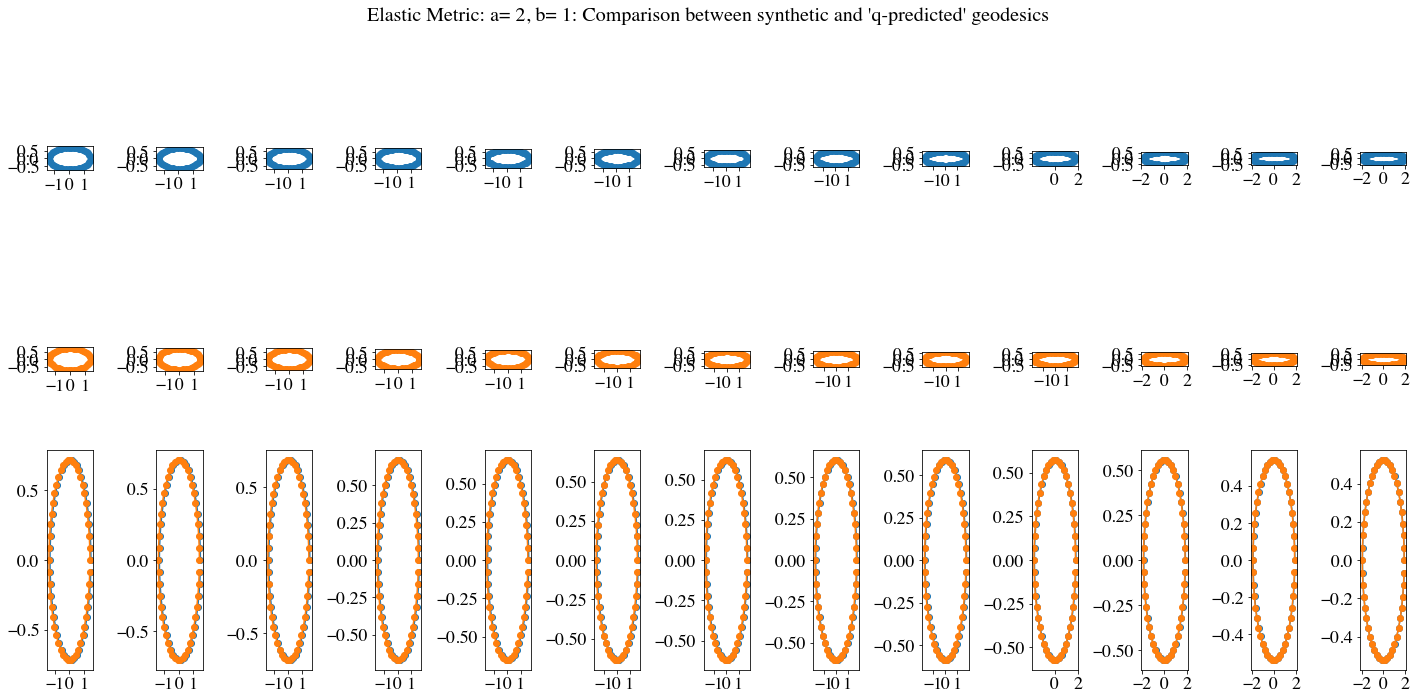

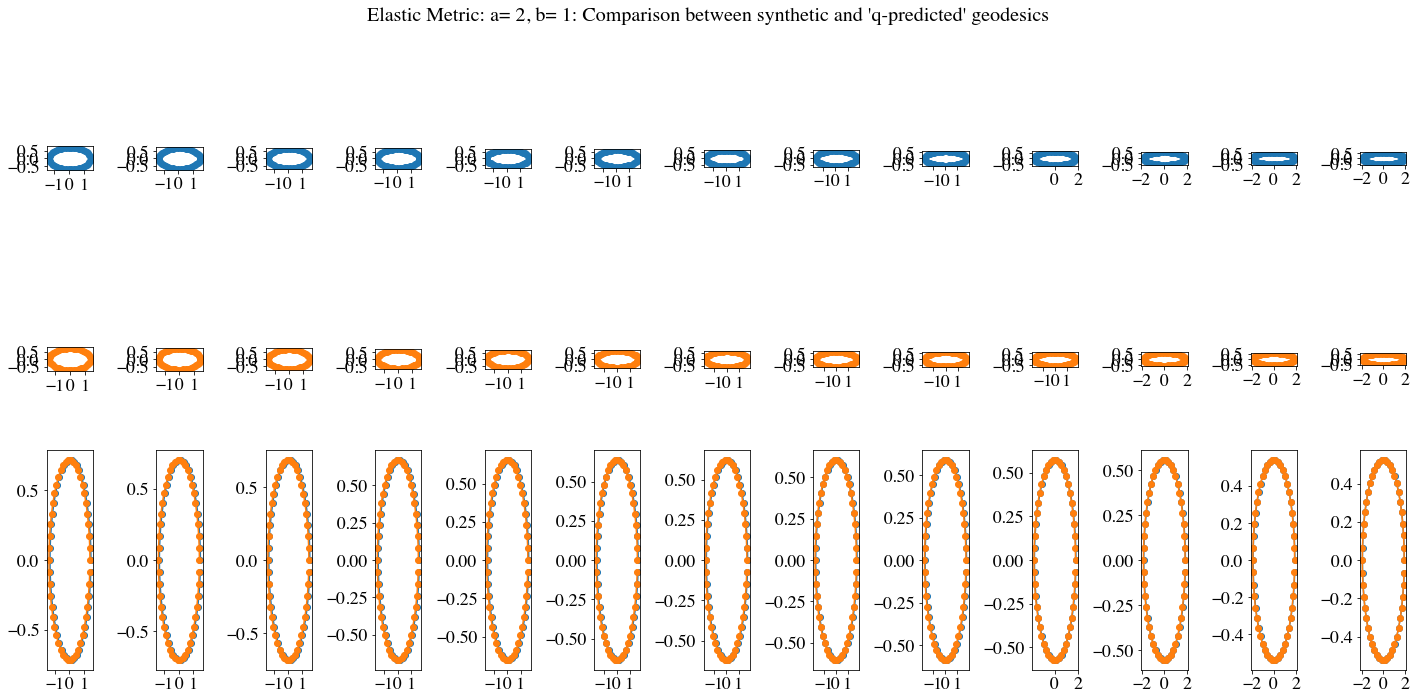

In [229]:
#testing to make sure that the polynomial function works just as well as the geodesic function...

import importlib
importlib.reload(qfit)

qfit.ftrans_plot_predictions_nongeodesic(geods_circle_ell[0],a=2,b=1,degree = 1, split=True)
qfit.ftrans_plot_predictions(geods_circle_ell[0], a=2, b=1, split=True)

^ this shows that these errors are happening even on synthetic data

this is good because it means that our data is not UN-fittable. there is just an error in the code-- which we can fix!

also note that the best a SHOULD be 1 on the synthetic data....